In [1]:
#!jt -t chesterish -T
#!jt -r

# Parametros base

Precio promedio(General)
Graficos series de tiempo



Se estudiará primero con el `Tipo_de_Cliente` = **Tradicional** que es el segmento de interes.

Ademas los graficos se presentaran todos para el producto de interes `Y_producto` = __1010078__

In [2]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
#    start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================
start_time_0 = time.time()

In [3]:
#===================================
# Archivo
#===================================
Zona_df='Z001'


# Ordenador de escritorio
file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'

"""
#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
"""

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'

In [4]:
#===================================
# Dicionario 
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

# Intalar paquetes, Abrir data y ajustarla 

## import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

from sklearn.model_selection import train_test_split

In [6]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

## Datos  
Se cargan los datos de
Ventas y la defincion de los productos
Ventas está en `data_v` y despues pasa a ser `data`

Productos estan cargados en `DF_products`


El que combina a ambos `DF_Full`

###  Ventas

In [7]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Ventas'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_V = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)
#elimina una columna en especifico
data_V.drop('Año natural', inplace=True, axis=1)
data_V.head(1)

Zona de ventas Zona de ventas.1   Cliente           Cliente.1  \
0           Z001         Santiago  10003742  Ferrer Leiva Sonia   

      Cliente - Local Cliente - Local.1 Material Día natural Kilos Venta KG  \
0  Ferrer Leiva Sonia             38458  1010077  09.02.2018             12   

  Venta Neta  ...            Centro.1   Población Tipo de cliente  Cluster  \
0     13.685  ...  Sucursal Lo Espejo  La Pintana     Tradicional  Clásico   

  Segmento            Segmento.1     Categoría Cliente Zona de reparto  \
0       50  Cobertura Pequeno SD  Especialista en Proc      1513112010   

  Año Creación Material Favorito  
0         2007           1010077  

[1 rows x 23 columns]

In [8]:
data_V[['Material','Kilos Venta KG','Venta Neta','Precio Promedio','Día natural']].head()

Material Kilos Venta KG Venta Neta Precio Promedio Día natural
0  1010077             12     13.685           1.190  09.02.2018
1  1010077             12     15.660           1.350  04.05.2018
2  1010077             12     14.388           1.250  22.06.2018
3  1010077             12     12.753           1.090  26.10.2018
4  1010077             12     14.887           1.290  08.03.2019

#### Funcion

In [9]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    for i in df.columns.to_list():
        df=df[df[i].notna()]

    #========================================
    # Funcion para asignar el tipo de cambio
    #----------------------------------------
    def categ_uniq(x):   
        y=str(x)
        y=y[len(y)-3:]
        if(y=='USD'):
            return y
        else:#if(x[len(x)-3:]=='CLP'):
            return 'CLP'

    #df['Unidad Venta']=df['Venta Neta'].apply(categ_uniq)
    #df['Unidad Precio']=df['Precio Promedio'].apply(categ_uniq)



    #==========================================================
    # Cambio de las comas y valores
    #----------------------------------------------------------
    def CLP_Dolar(x):
        x=str(x)
        x=x.replace('.', '')
        x=x.replace(',', '.')
        x=str(x)
        if(x[len(x)-3:]=='USD'):
            x=x.split(' USD')[0]
            x= None
            #x=x*720
        elif(x[len(x)-3:]=='CLP'):
            x=x.split(' CLP')[0]
            x=float(x)
        return x

    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    def delete_asterisco(x):
        x=str(x)
        if(x=='*'):
            x=''
        else:
            x
        return x


#=====================================================
#proceso iterativo:
#=====================================================

    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
    
    # se elimina el punto definido para los miles
        if(i!='Kilos Venta KG'):
            df[i]=df[i].apply(CLP_Dolar)
        else:
            df[i]=df[i].apply(change_num_point)
            # se reemplaza la coma por un punto, para definir los decimales correctamente
            df[i]=df[i].apply(change_num_coma)
        # se elimina el valor * 
        df[i]=df[i].apply(delete_asterisco)
        df=df[df[i].notna()]
        df=df[df[i]!='None']
        df[i]=df[i].astype('float64')
        # Se pasa de ser un str a un int
        print(i)
        #df[i]=df[i].astype('int64')



    #==========================================================================================
    # Ajuste de las fechas
    #-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%d.%m.%Y').date())
        #Separacion fecha
    df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    df['Mes']=df["Día natural"].apply(lambda x: x.month)
    df['Año']=df["Día natural"].apply(lambda x: x.year)

    #df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    end_time = time.time()

    time_convert(end_time - start_time)
    return df

In [10]:
#=====================================
# Aplicacion del ajuste de los datos
#=====================================

data=Ajuste_data(data_V)

Kilos Venta KG
Venta Neta
Precio Promedio
Time Lapsed = 0:0:20.461561918258667 
 H:m:s


### Data Productos 

In [11]:
name_archivo= 'Detalles de los productos'+'.csv'

file_direct=file_direct_Clear+ name_archivo

col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

DF_Products = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)

print(DF_Products.iloc[1,:])

print(DF_Products.shape)
DF_Products=DF_Products[DF_Products['Año natural']=='2021']
print(DF_Products.shape)
DF_Products=DF_Products.reset_index()
DF_Products=DF_Products[['Material',
 'Nivel 4',
 'Nivel 4.1',
 'Sector',
 'Tipo de material',
 'Tipo de material.1',
 'Marca',
 'Nivel 2',
 'Granel/Envasado',
 'Marinado',
 'Nivel 3',
 'Grupo artículos',
 'Estado',
 'Estandar',
 'Envase']]
DF_Products.tail(1)

Sector                                 Cerdo
Tipo de material                        ZCER
Tipo de material.1        Prod. Term. Cerdos
Marca                       SUPER CERDO (SC)
Nivel 2                              Chuleta
Granel/Envasado                       GRANEL
Marinado                            MARINADO
Material                             1020027
Nivel 3                       Chuleta Vetada
Nivel 4                           2002036179
Nivel 4.1             Chuleta Vetada Repasad
Grupo artículos                        02020
Estado                           REFRIGERADO
Estandar                       PESO VARIABLE
Envase                          NO CONGELADO
Año natural                             2019
Kilos Venta KG                     3.615.396
Venta Neta                 6.676.505.142 CLP
Precio Promedio                    1.847 CLP
Name: 1, dtype: object
(52, 19)
(13, 19)


Material     Nivel 4                Nivel 4.1 Sector Tipo de material  \
12  1010077  1014022073  Trutro Entero Selección  Pollo             ZAVE   

   Tipo de material.1             Marca Nivel 2 Granel/Envasado  Marinado  \
12   Prod. Term.  Ave  SUPER POLLO (SP)  Trutro          GRANEL  MARINADO   

          Nivel 3 Grupo artículos       Estado       Estandar        Envase  
12  Trutro Entero           01050  REFRIGERADO  PESO VARIABLE  NO CONGELADO

### Merge con datos

In [12]:
DF_Full=pd.merge(data , DF_Products 
     , how='inner')
print(DF_Full.shape)
print(DF_Full.columns.to_list())

time_convert(time.time()-start_time_0)

DF_Full.head(3)

(1061161, 40)
['Zona de ventas', 'Zona de ventas.1', 'Cliente', 'Cliente.1', 'Cliente - Local', 'Cliente - Local.1', 'Material', 'Día natural', 'Kilos Venta KG', 'Venta Neta', 'Precio Promedio', 'Frecuencia Historica', 'Centro', 'Centro.1', 'Población', 'Tipo de cliente', 'Cluster', 'Segmento', 'Segmento.1', 'Categoría Cliente', 'Zona de reparto', 'Año Creación', 'Material Favorito', 'Semana', 'Mes', 'Año', 'Nivel 4', 'Nivel 4.1', 'Sector', 'Tipo de material', 'Tipo de material.1', 'Marca', 'Nivel 2', 'Granel/Envasado', 'Marinado', 'Nivel 3', 'Grupo artículos', 'Estado', 'Estandar', 'Envase']
Time Lapsed = 0:0:26.347666263580322 
 H:m:s


Zona de ventas Zona de ventas.1   Cliente           Cliente.1  \
0           Z001         Santiago  10003742  Ferrer Leiva Sonia   
1           Z001         Santiago  10003742  Ferrer Leiva Sonia   
2           Z001         Santiago  10003742  Ferrer Leiva Sonia   

      Cliente - Local Cliente - Local.1 Material Día natural  Kilos Venta KG  \
0  Ferrer Leiva Sonia             38458  1010077  2018-02-09            12.0   
1  Ferrer Leiva Sonia             38458  1010077  2018-05-04            12.0   
2  Ferrer Leiva Sonia             38458  1010077  2018-06-22            12.0   

   Venta Neta  ...  Tipo de material.1             Marca Nivel 2  \
0     13685.0  ...    Prod. Term.  Ave  SUPER POLLO (SP)  Trutro   
1     15660.0  ...    Prod. Term.  Ave  SUPER POLLO (SP)  Trutro   
2     14388.0  ...    Prod. Term.  Ave  SUPER POLLO (SP)  Trutro   

  Granel/Envasado  Marinado        Nivel 3 Grupo artículos       Estado  \
0          GRANEL  MARINADO  Trutro Entero           01050  REFRIGERADO   
1          GRANEL  MARINADO  Trutro Entero           01050  REFRIGERADO   
2          GRANEL  MARINADO  Trutro Entero           01050  REFRIGERADO   

        Estandar        Envase  
0  PESO VARIABLE  NO CONGELADO  
1  PESO VARIABLE  NO CONGELADO  
2  PESO VARIABLE  NO CONGELADO  

[3 rows x 40 columns]

In [13]:
#Ajuste Material
def material_name(x):
    s1=str(x['Material'])
    s2=str(x['Nivel 4.1'])
    return(s1+'\n ('+s2+')')
#df['Material Nombre']=df.apply(lambda x:  material_name(x), axis=1)
DF_Full['Material Nombre']=DF_Full.apply(lambda x:  material_name(x), axis=1)

# Material Precios y volumen por venta

## Volumen de ingresos y volumen de Ventas por canal

Se justificará el trabajo del cananl, tomando en cuenta los volumenes que son vendidos por cada producto mensualmente

### Data 

##### Función

In [14]:
#==========================
# data con los valores promedio de las ventas
#(promedio por volumen)
#==========================
#[DF_Full['Tipo de cliente']==Tipo_de_Cliente]

def data_Ton(DF_G_O):
    DF_G=DF_G_O.copy()
    DF_G['Precio Promedio']=DF_G['Venta Neta']/DF_G['Kilos Venta KG']
    DF_G['Toneladas de Ventas Tg']=DF_G['Kilos Venta KG']/1000

    # Ajuste fechas
    #DF_G=DF_G.drop(columns='Año',axis=1)
    DF_G=DF_G.drop(columns='Semana',axis=1)
    DF_G.Mes=DF_G.Mes.astype('category')
    print('Cantidad de columnas',len(DF_G.columns))

    #Ajuste Material
    def material_name(x):
        s1=str(x['Material'])
        s2=str(x['Nivel 4.1'])
        return(s1+'\n('+s2+')')
    DF_G['Material Nombre']=DF_G.apply(lambda x:  material_name(x), axis=1)

    print('Cantidad de productos',len(DF_G['Material Nombre'].unique()))

    DF_G= DF_G[DF_G['Precio Promedio'].notna()]
    print('Cantidad de productos',len(DF_G['Material Nombre'].unique()))

    #Ajuste del ingreso total Millones
    DF_G['Ingreso Neto en Miles de Millones CLP']=DF_G['Venta Neta']/(10**9)
    #print(DF_G.columns[len(DF_G)-1])
    
    
    return(DF_G)

In [15]:
(10**9)

1000000000

##### Data Group

In [16]:
#Group sucursal
data_G_Sucursal_Año_Mes=DF_Full.groupby(['Tipo de cliente','Centro.1','Material','Nivel 4.1','Año','Mes']).sum().reset_index()

#Group sucursal
data_G_Sucursal_Año=DF_Full.groupby(['Tipo de cliente','Centro.1','Material','Nivel 4.1','Año']).sum().reset_index()

#GRoup(Cliente /Material, Año Mes)
data_G_Año_Mes=DF_Full.groupby(['Tipo de cliente','Material','Nivel 4.1','Año','Mes']).sum().reset_index()

#GRoup(Cliente /Material, Año)
data_G_Año=DF_Full.groupby(['Tipo de cliente','Material','Nivel 4.1','Año']).sum().reset_index()


data_G_Sucursal_Año_Mes=data_Ton(data_G_Sucursal_Año_Mes)
print('data_G_Sucursal_Año_Mes')
data_G_Sucursal_Año=data_Ton(data_G_Sucursal_Año)
print('data_G_Sucursal_Año')
data_G_Año_Mes=data_Ton(data_G_Año_Mes)
print('data_G_Año_Mes')
data_G_Año=data_Ton(data_G_Año)
print('data_G_Año')

data_G_Año.head()

Cantidad de columnas 10
Cantidad de productos 13
Cantidad de productos 13
data_G_Sucursal_Año_Mes
Cantidad de columnas 10
Cantidad de productos 13
Cantidad de productos 13
data_G_Sucursal_Año
Cantidad de columnas 9
Cantidad de productos 13
Cantidad de productos 13
data_G_Año_Mes
Cantidad de columnas 9
Cantidad de productos 13
Cantidad de productos 13
data_G_Año


Tipo de cliente Material                 Nivel 4.1   Año  Kilos Venta KG  \
0     Foodservice  1010002     Con Menudencia >2.130  2018         88485.0   
1     Foodservice  1010002     Con Menudencia >2.130  2019         71224.0   
2     Foodservice  1010002     Con Menudencia >2.130  2020         37783.0   
3     Foodservice  1010002     Con Menudencia >2.130  2021         21064.0   
4     Foodservice  1010048  Pechuga Entera Selección  2018        581990.0   

    Venta Neta  Precio Promedio    Mes  Toneladas de Ventas Tg  \
0  101506036.0      1147.155292   6407                  88.485   
1   84548270.0      1187.075564   4641                  71.224   
2   54563775.0      1444.135590   2183                  37.783   
3   38086718.0      1808.142708   1605                  21.064   
4  810446507.0      1392.543698  55547                 581.990   

                       Material Nombre  Ingreso Neto en Miles de Millones CLP  
0     1010002\n(Con Menudencia >2.130)                               0.101506  
1     1010002\n(Con Menudencia >2.130)                               0.084548  
2     1010002\n(Con Menudencia >2.130)                               0.054564  
3     1010002\n(Con Menudencia >2.130)                               0.038087  
4  1010048\n(Pechuga Entera Selección)                               0.810447

###### Describe 

In [17]:
#==========================
# df para un producto en especifico
#==========================
df=data_G_Sucursal_Año_Mes.copy()#[data_fecha_medio['Material']== Y_producto].copy()#[Data['Precio Unitario CLP / KG']<5000]
"""
df['Semana']=df['Semana'].astype('category')
df['Año']=df['Año'].astype('category')
df.Mes=df.Mes.astype('int64')
"""

"\ndf['Semana']=df['Semana'].astype('category')\ndf['Año']=df['Año'].astype('category')\ndf.Mes=df.Mes.astype('int64')\n"

In [18]:
df.columns

Index(['Tipo de cliente', 'Centro.1', 'Material', 'Nivel 4.1', 'Año', 'Mes',
       'Kilos Venta KG', 'Venta Neta', 'Precio Promedio',
       'Toneladas de Ventas Tg', 'Material Nombre',
       'Ingreso Neto en Miles de Millones CLP'],
      dtype='object')

In [19]:
df.groupby(['Material Nombre','Tipo de cliente', 'Año']).sum()

Kilos Venta KG  \
Material Nombre                  Tipo de cliente  Año                    
1010002\n(Con Menudencia >2.130) Foodservice      2018         88485.0   
                                                  2019         71224.0   
                                                  2020         37783.0   
                                                  2021         21064.0   
                                 Grandes Clientes 2018       1176538.0   
...                                                                ...   
1020253\n(Pierna Pulpa 57)       Industriales     2021           106.0   
                                 Tradicional      2018        243713.0   
                                                  2019        199773.0   
                                                  2020        329215.0   
                                                  2021        569344.0   

                                                          Venta Neta  \
Material Nombre                  Tipo de cliente  Año                  
1010002\n(Con Menudencia >2.130) Foodservice      2018  1.015060e+08   
                                                  2019  8.454827e+07   
                                                  2020  5.456378e+07   
                                                  2021  3.808672e+07   
                                 Grandes Clientes 2018  1.188227e+09   
...                                                              ...   
1020253\n(Pierna Pulpa 57)       Industriales     2021  2.543760e+05   
                                 Tradicional      2018  4.555100e+08   
                                                  2019  4.373427e+08   
                                                  2020  9.185688e+08   
                                                  2021  1.391060e+09   

                                                        Precio Promedio  \
Material Nombre                  Tipo de cliente  Año                     
1010002\n(Con Menudencia >2.130) Foodservice      2018     43056.800152   
                                                  2019     42465.271352   
                                                  2020     48120.453082   
                                                  2021     48292.289374   
                                 Grandes Clientes 2018     36501.373681   
...                                                                 ...   
1020253\n(Pierna Pulpa 57)       Industriales     2021      2399.773585   
                                 Tradicional      2018     69870.559493   
                                                  2019     80354.168791   
                                                  2020    100098.410593   
                                                  2021     74699.623713   

                                                        Toneladas de Ventas Tg  \
Material Nombre                  Tipo de cliente  Año                            
1010002\n(Con Menudencia >2.130) Foodservice      2018                  88.485   
                                                  2019                  71.224   
                                                  2020                  37.783   
                                                  2021                  21.064   
                                 Grandes Clientes 2018                1176.538   
...                                                                        ...   
1020253\n(Pierna Pulpa 57)       Industriales     2021                   0.106   
                                 Tradicional      2018                 243.713   
                                                  2019                 199.773   
                                                  2020                 329.215   
                                                  2021                 569.344   

                                                        Ingreso Neto en Miles de Millones CLP  
Material Nombre  

In [20]:
1.015060e+08/10**6

101.506

In [21]:
DF_Full.groupby(['Material Nombre','Tipo de cliente', 'Año']).sum()

Kilos Venta KG  \
Material Nombre                   Tipo de cliente  Año                    
1010002\n (Con Menudencia >2.130) Foodservice      2018         88485.0   
                                                   2019         71224.0   
                                                   2020         37783.0   
                                                   2021         21064.0   
                                  Grandes Clientes 2018       1176538.0   
...                                                                 ...   
1020253\n (Pierna Pulpa 57)       Industriales     2021           106.0   
                                  Tradicional      2018        243713.0   
                                                   2019        199773.0   
                                                   2020        329215.0   
                                                   2021        569344.0   

                                                           Venta Neta  \
Material Nombre                   Tipo de cliente  Año                  
1010002\n (Con Menudencia >2.130) Foodservice      2018  1.015060e+08   
                                                   2019  8.454827e+07   
                                                   2020  5.456378e+07   
                                                   2021  3.808672e+07   
                                  Grandes Clientes 2018  1.188227e+09   
...                                                               ...   
1020253\n (Pierna Pulpa 57)       Industriales     2021  2.543760e+05   
                                  Tradicional      2018  4.555100e+08   
                                                   2019  4.373427e+08   
                                                   2020  9.185688e+08   
                                                   2021  1.391060e+09   

                                                         Precio Promedio  \
Material Nombre                   Tipo de cliente  Año                     
1010002\n (Con Menudencia >2.130) Foodservice      2018        1154050.0   
                                                   2019         979471.0   
                                                   2020         523104.0   
                                                   2021         523058.0   
                                  Grandes Clientes 2018        2391264.0   
...                                                                  ...   
1020253\n (Pierna Pulpa 57)       Industriales     2021           2400.0   
                                  Tradicional      2018        7105958.0   
                                                   2019        8138522.0   
                                                   2020       14275049.0   
                                                   2021       22302416.0   

                                                         Semana    Mes  
Material Nombre                   Tipo de cliente  Año                  
1010002\n (Con Menudencia >2.130) Foodservice      2018   26143   6407  
                                                   2019   18852   4641  
                                                   2020    9067   2183  
                                                   2021    6325   1605  
                                  Grandes Clientes 2018   59675  14668  
...                                                         ...    ...  
1020253\n (Pierna Pulpa 57)       Industriales     2021      16      4  
                                  Tradicional      2018   90875  22334  
                                                   2019   85602  21043  
                                                   2020  155971  37290  
                                                   2021  208590  52572  

[194 rows x 5 columns]

### Anual

#### Ingresos 

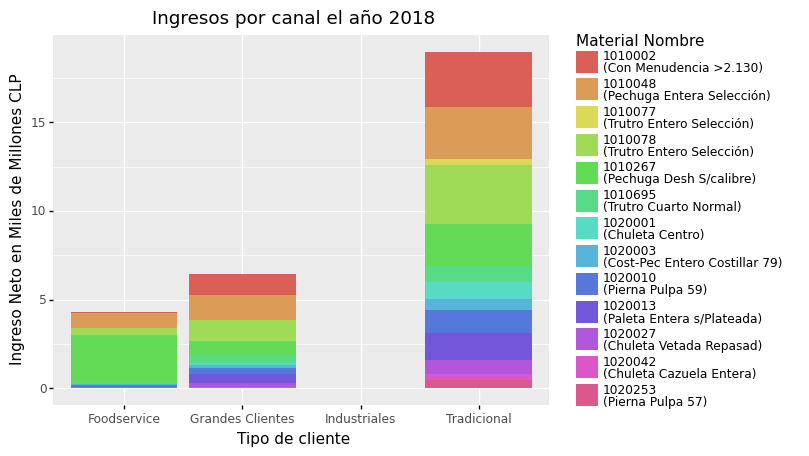

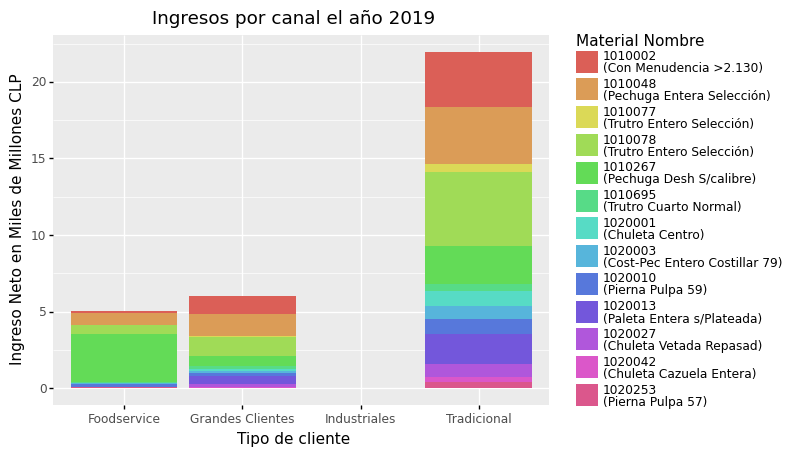

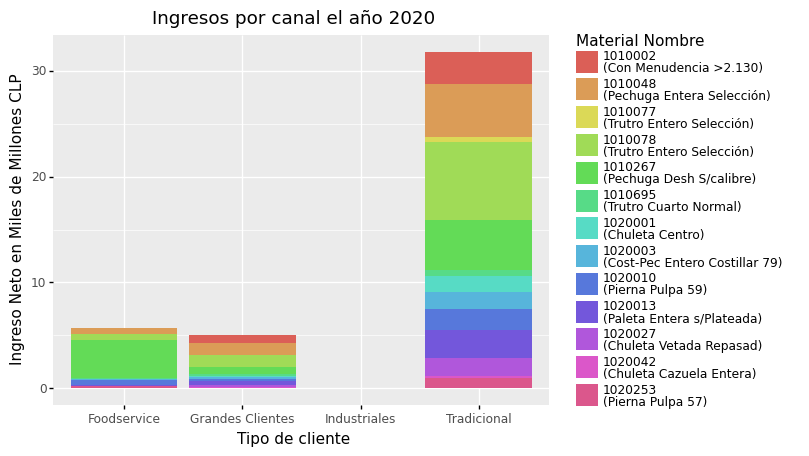

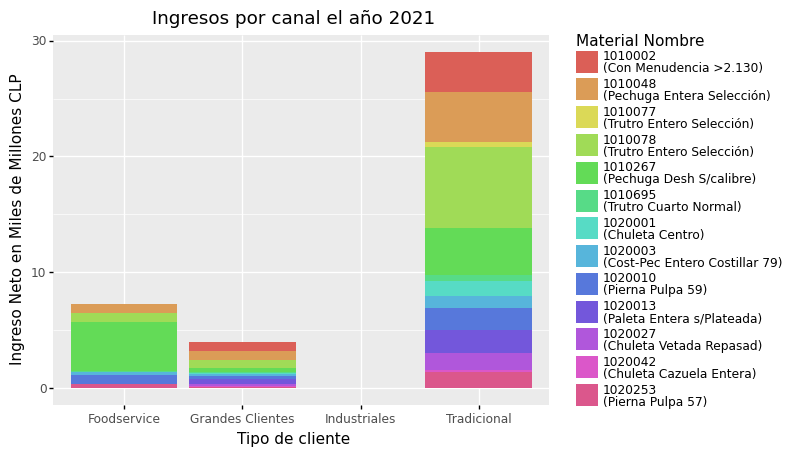

[<ggplot: (132826297296)>,
 <ggplot: (132826279918)>,
 <ggplot: (132826275756)>,
 <ggplot: (132826297119)>]

In [22]:
# Canal
#=================================================
# Variaciond e los ingresos por material
#=================================================

Ingr_list_Canal=[]
df=data_G_Año.copy()
df.Año=df.Año.astype('int64')
(df.Año.unique()).sort()
Y_col='Ingreso Neto en Miles de Millones CLP'
for i in (df.Año.unique()):
    Ingr_list_Canal.append(ggplot(df[df.Año==i],
                            aes(x='Tipo de cliente', y=Y_col, fill='Material Nombre'))
     
        + geom_col(stat='identity',show_legend=True)
                   
        +ggtitle('Ingresos por canal el año ' + str(i))
                  )
Ingr_list_Canal

##### Ingresos Material Sucursal

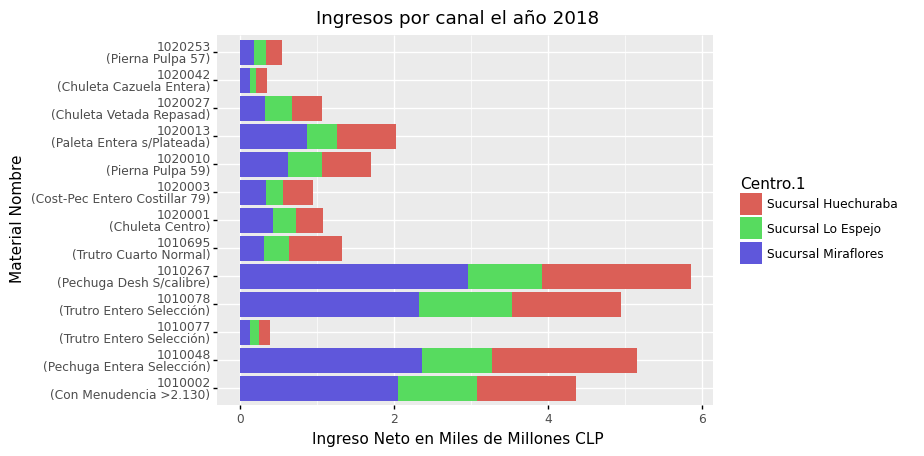

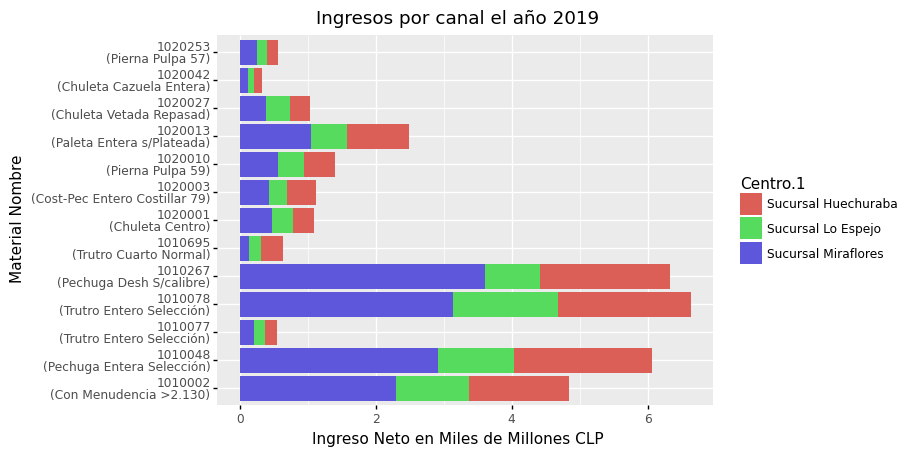

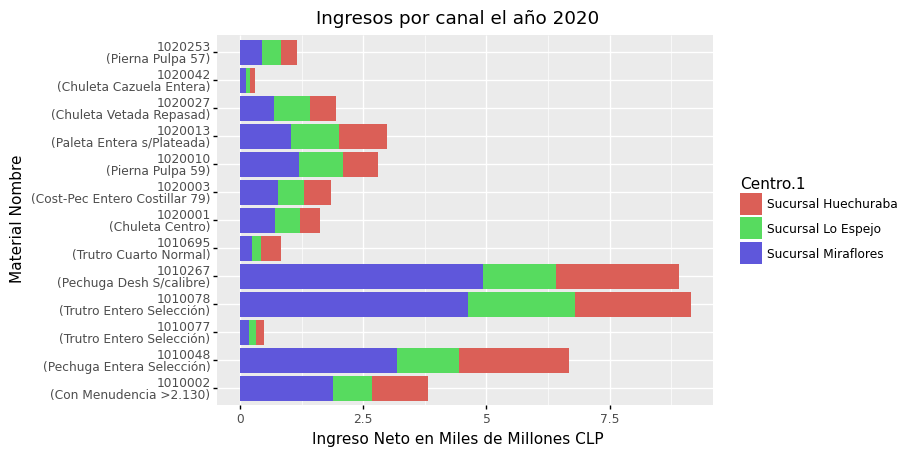

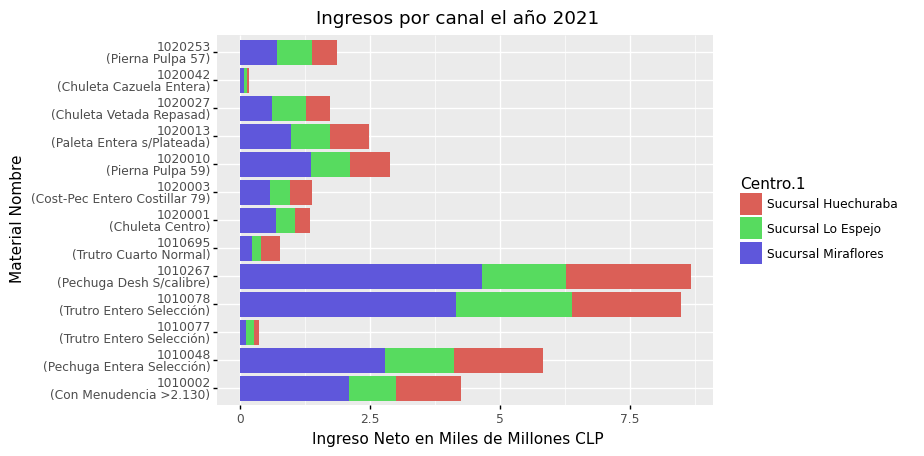

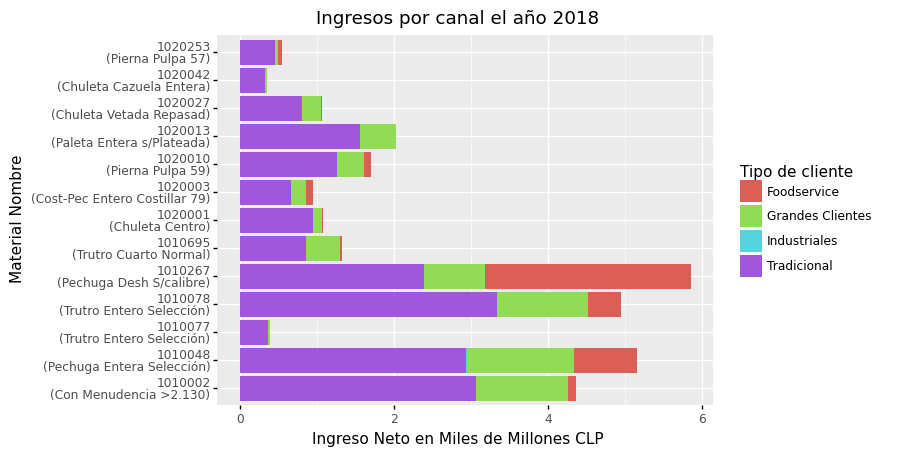

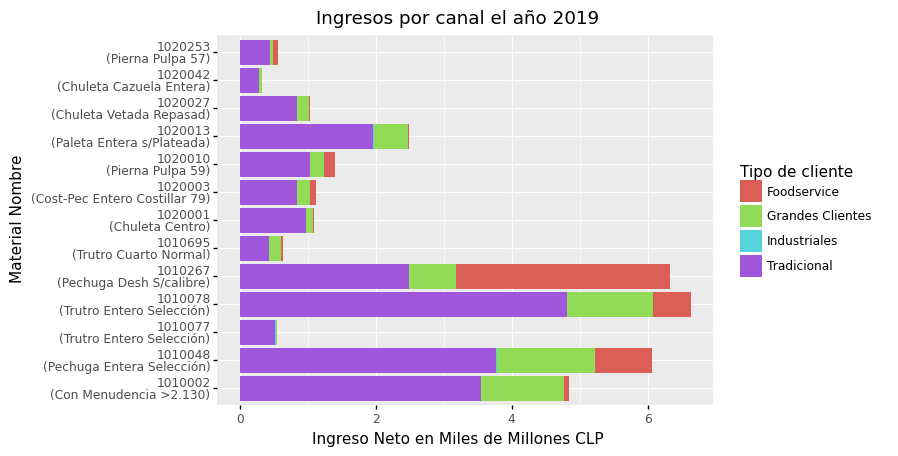

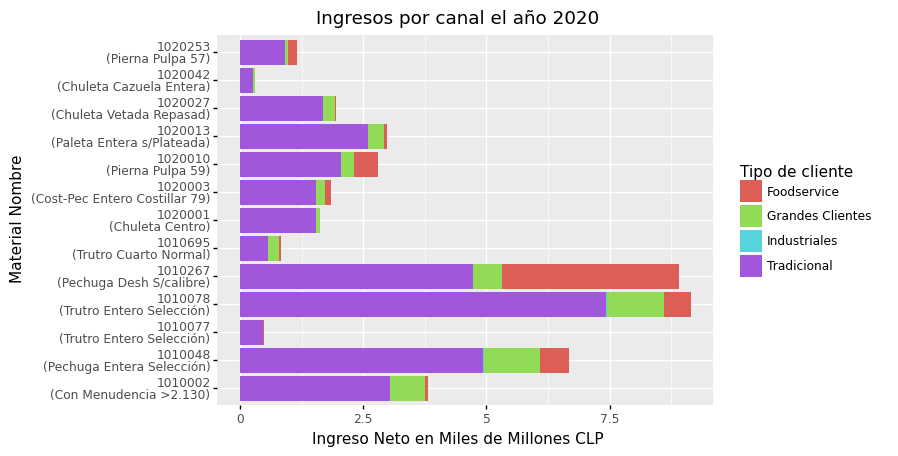

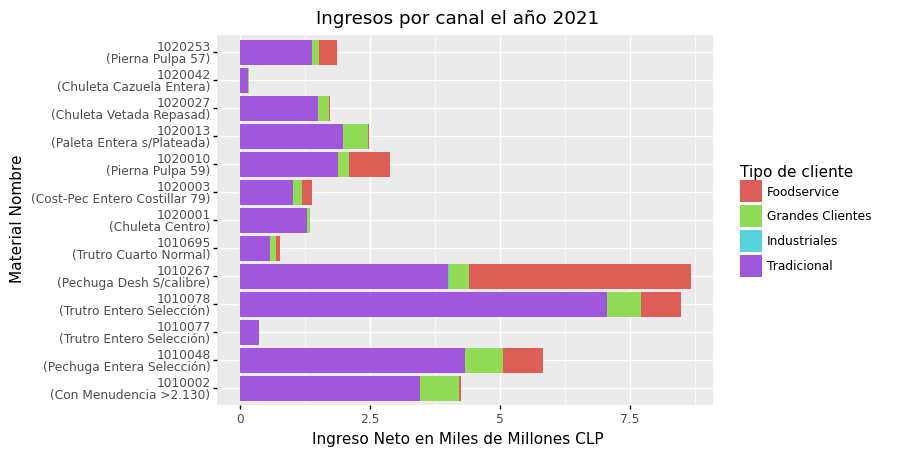

[<ggplot: (132828031263)>,
 <ggplot: (132828017098)>,
 <ggplot: (132827997474)>,
 <ggplot: (132827984381)>,
 <ggplot: (132827997600)>,
 <ggplot: (132827997657)>,
 <ggplot: (132827997564)>,
 <ggplot: (132827939124)>]

In [23]:
# Material
#=================================================
# Variaciond e los ingresos por material
#=================================================

Ingr_list_Material=[]

df=data_G_Sucursal_Año.copy()
(df.Año.unique()).sort()
Y_col='Ingreso Neto en Miles de Millones CLP'

#=============================================
# Sucursal
#=============================================

for i in (df.Año.unique()):
    Ingr_list_Material.append(ggplot(df[df.Año==i],
                            aes(x='Material Nombre', y=Y_col, fill='Centro.1'))
     
        + geom_col(stat='identity',show_legend=True)
                   
        +ggtitle('Ingresos por canal el año ' + str(i))
         #+theme(axis_text_x = element_text(angle=90, hjust=1))#,figure_size=(10,8)
         +coord_flip()
                  )

#========================================
# Canal Tipo de cliente
#========================================

for i in (df.Año.unique()):
    Ingr_list_Material.append(ggplot(df[df.Año==i],
                            aes(x='Material Nombre', y=Y_col, fill='Tipo de cliente'))

        + geom_col(stat='identity',show_legend=True)

        +ggtitle('Ingresos por canal el año ' + str(i))
         #+theme(axis_text_x = element_text(angle=90, hjust=1))#,figure_size=(10,8)
         +coord_flip()
                  )
Ingr_list_Material

#### PDF 

In [24]:
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(Ingr_list_Canal
                  ,file_direct_Graphic+'/Generales/'+'Anual'+"/Col Ingresos Anuales Canal.pdf")

save_as_pdf_pages(Ingr_list_Material
                  ,file_direct_Graphic+'/Generales/'+'Anual'+"/Col Ingresos Anuales Material.pdf")
time_convert(time.time()-start_time)

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales/Anual/Col Ingresos Anuales Canal.pdf
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales/Anual/Col Ingresos Anuales Material.pdf


Time Lapsed = 0:0:3.2403457164764404 
 H:m:s


#### ingresos Vertical 

Modioficar para que el listado de materiales solo aparesca en los años 2019 y 2021

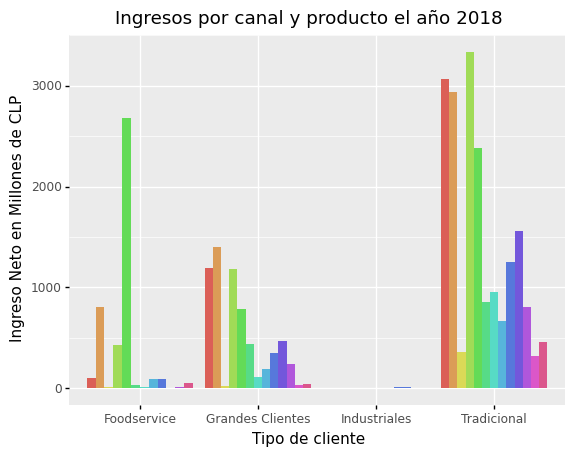

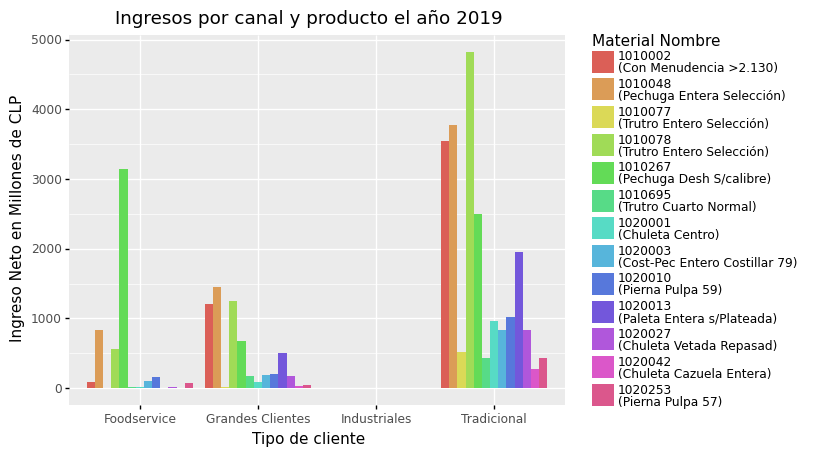

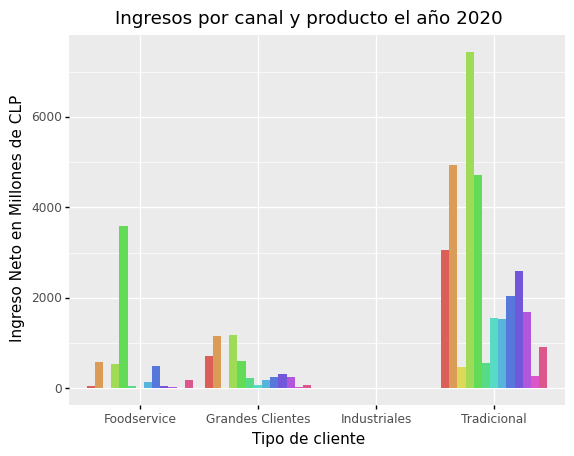

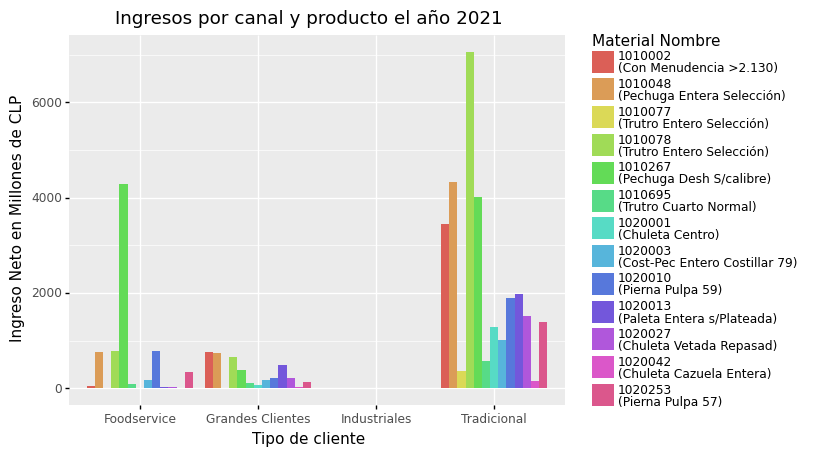

[<ggplot: (132775062519)>,
 <ggplot: (132775006157)>,
 <ggplot: (132775071937)>,
 <ggplot: (132775070338)>]

In [25]:
#         INGRESOS MATERIAL VERTICAL
#=================================================
# Variacion de los INGRESOS por material Canal
#=================================================
Ingresos_list_material_Vert=[]
df=data_G_Año.copy()

(df.Año.unique()).sort()

Y_col='Ingreso Neto en Millones de CLP'
df['Ingreso Neto en Millones de CLP']=df['Venta Neta']/10**6

for i in (df.Año.unique()):
    if((i==2018)|(i==2020)):
        Ingresos_list_material_Vert.append(ggplot(df[df.Año==i],
                                aes(x='Tipo de cliente', y=Y_col, fill='Material Nombre'))

            + geom_col(stat='identity',show_legend=True,position='dodge')

            +ggtitle('Ingresos por canal y producto el año ' + str(i))
            
             + theme( legend_position='none')
                                )
                 
    else:
        Ingresos_list_material_Vert.append(ggplot(df[df.Año==i],
                                aes(x='Tipo de cliente', y=Y_col, fill='Material Nombre'))

            + geom_col(stat='identity',show_legend=True,position='dodge')

            +ggtitle('Ingresos por canal y producto el año ' + str(i))
                      )
Ingresos_list_material_Vert

##### PDF 

In [26]:
save_as_pdf_pages(Ingresos_list_material_Vert  
                  ,file_direct_Graphic+'/Generales/'+"/Anual/Col Ingresos Anuales Material y Canal.pdf")

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales//Anual/Col Ingresos Anuales Material y Canal.pdf


### Toneladas 

Modioficar para que el listado de materiales solo aparesca en los años 2019 y 2021

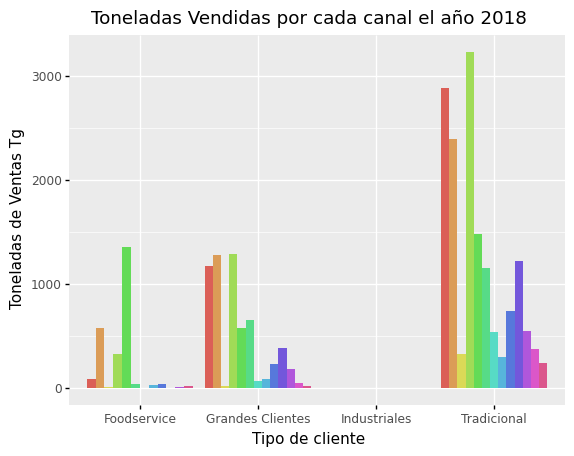

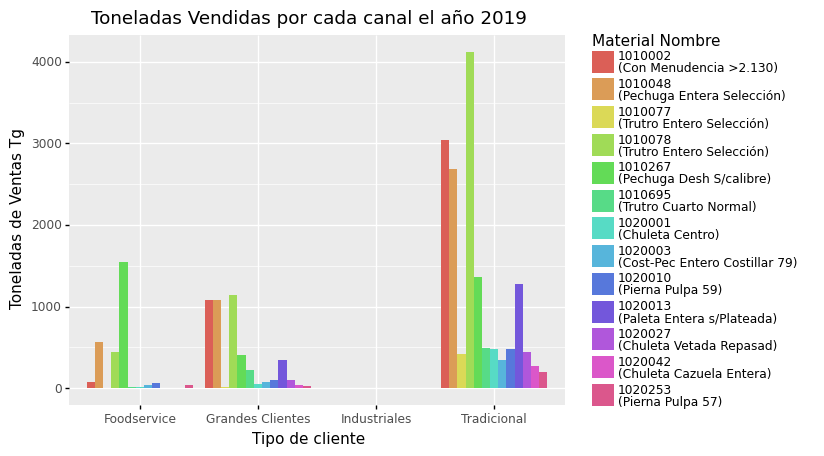

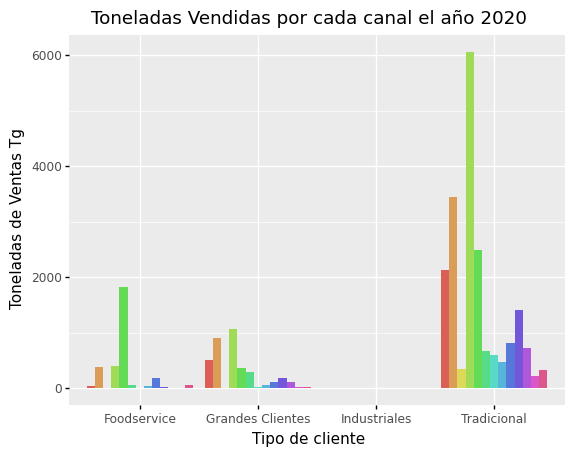

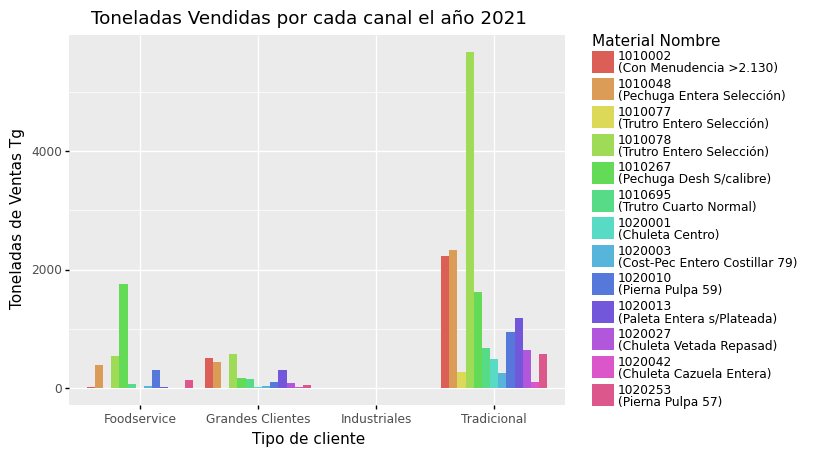

[<ggplot: (132827993468)>,
 <ggplot: (132829072436)>,
 <ggplot: (132828333529)>,
 <ggplot: (132775070356)>]

In [42]:
#         TONELADAS MATERIAL
#=================================================
# Variacion de los tonealdas por material Canal
#=================================================
Ton_list_material=[]
df=data_G_Año.copy()

(df.Año.unique()).sort()
Y_col='Toneladas de Ventas Tg'
for i in (df.Año.unique()):
    if((i==2018)|(i==2020)):
        Ton_list_material.append(ggplot(df[df.Año==i],
                                aes(x='Tipo de cliente', y=Y_col, fill='Material Nombre'))

            + geom_col(stat='identity',show_legend=True,position='dodge')

            +ggtitle('Toneladas Vendidas por cada canal el año ' + str(i))
            
             + theme( legend_position='none')
                                )
                 
    else:
        Ton_list_material.append(ggplot(df[df.Año==i],
                                aes(x='Tipo de cliente', y=Y_col, fill='Material Nombre'))

            + geom_col(stat='identity',show_legend=True,position='dodge')

            +ggtitle('Toneladas Vendidas por cada canal el año ' + str(i))
                      )
Ton_list_material

##### Toneladas Sucursal 

######  Toneladas Sucursal/Canal

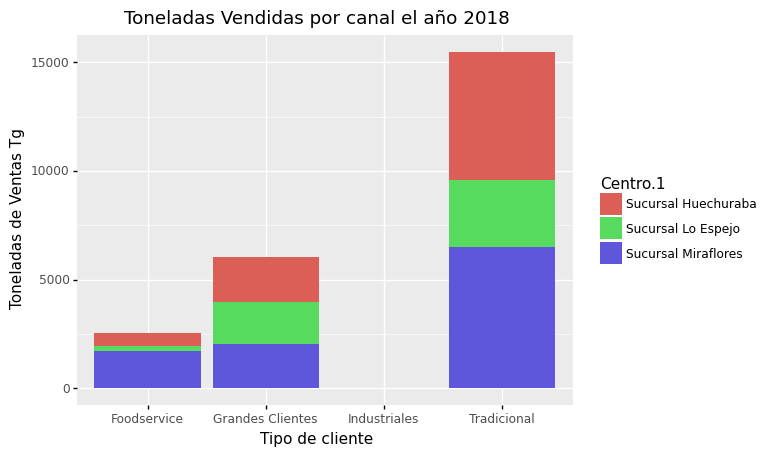

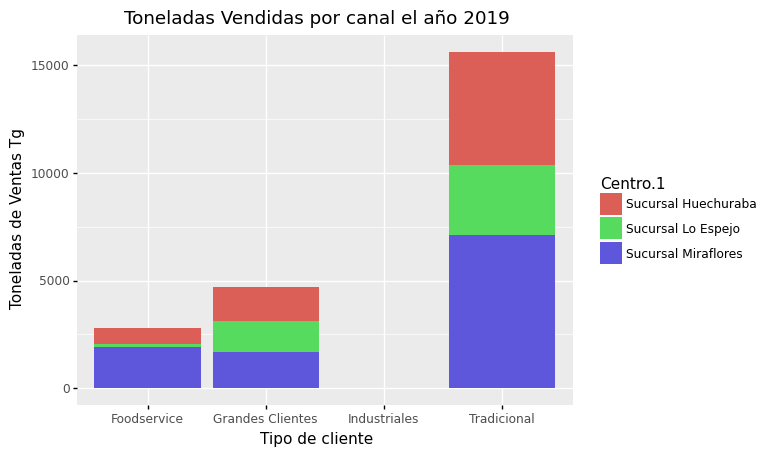

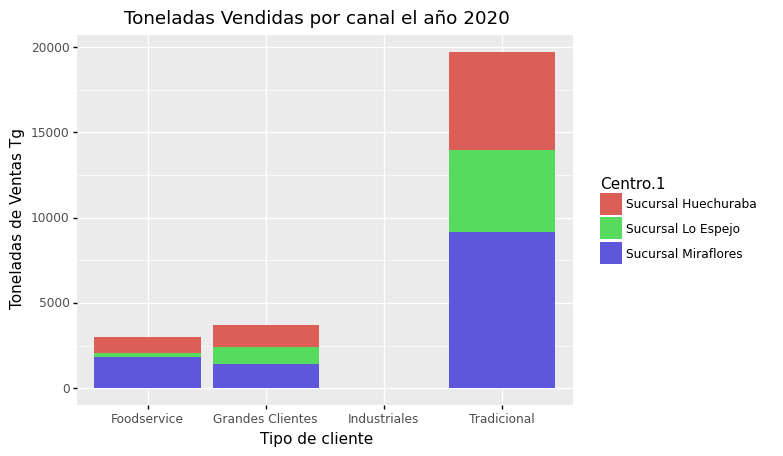

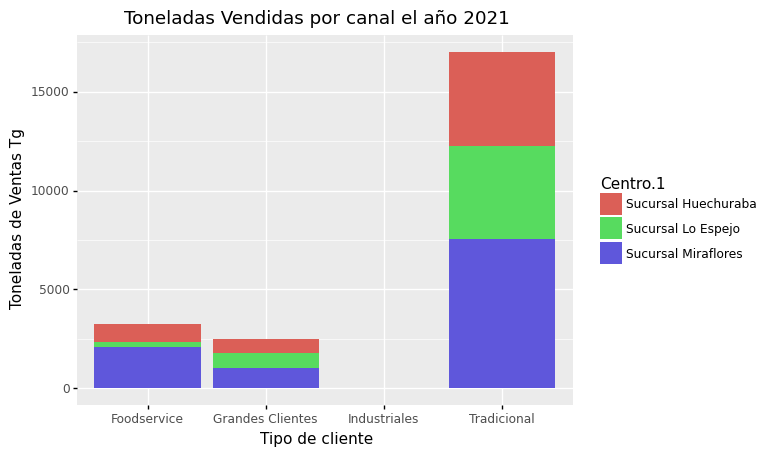

[<ggplot: (132775126050)>,
 <ggplot: (132827844042)>,
 <ggplot: (132824969981)>,
 <ggplot: (132825893660)>]

In [43]:
#         TONELADAS SUCURSAL
#=================================================
# Variacion de los tonealdas por  Canal
#=================================================
Ton_list_Sucursal=[]
df=data_G_Sucursal_Año.copy()

(df.Año.unique()).sort()
Y_col='Toneladas de Ventas Tg'
for i in (df.Año.unique()):
    Ton_list_Sucursal.append(ggplot(df[df.Año==i],
                            aes(x='Tipo de cliente', y=Y_col, fill='Centro.1'))
     
        + geom_col(stat='identity',show_legend=True)
                   
        +ggtitle('Toneladas Vendidas por canal el año ' + str(i))
                  )
Ton_list_Sucursal

###### Toneladas Sucursal/material 

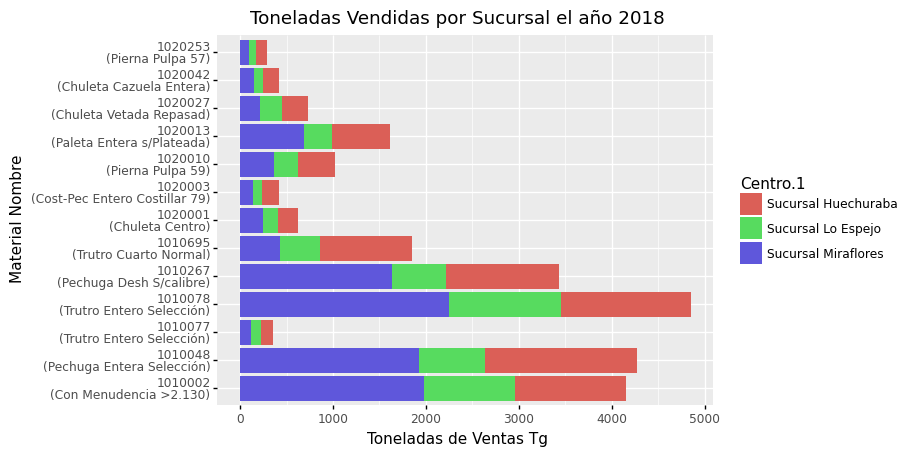

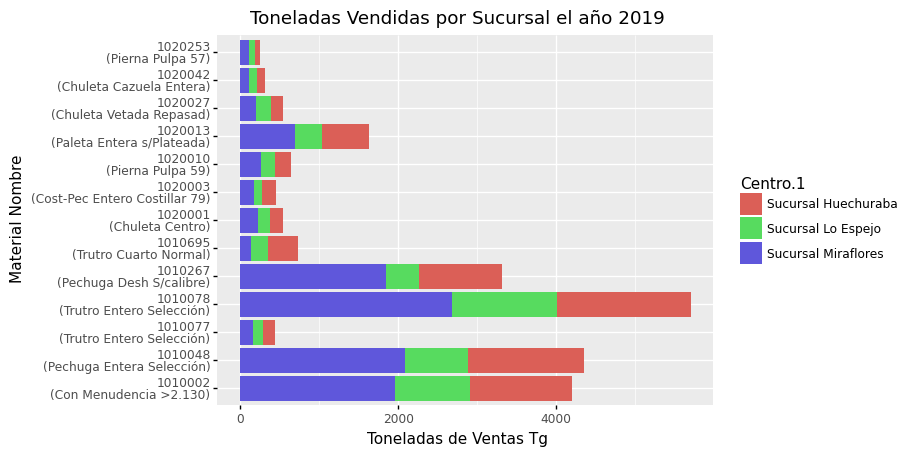

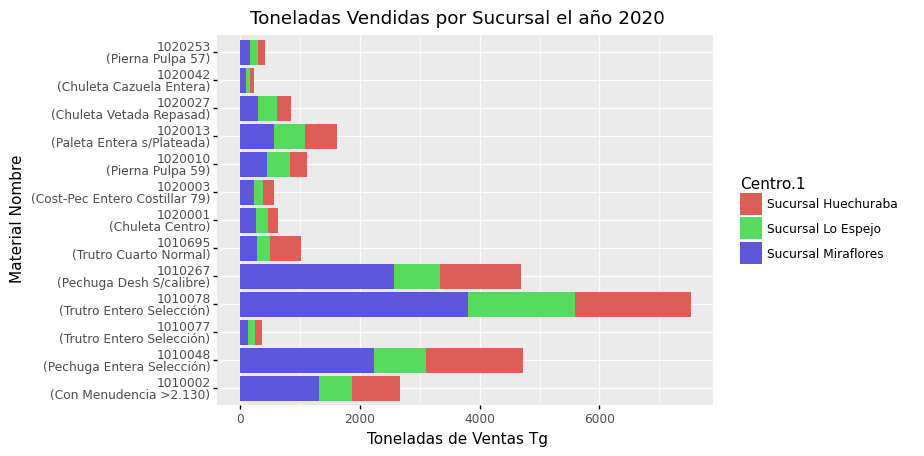

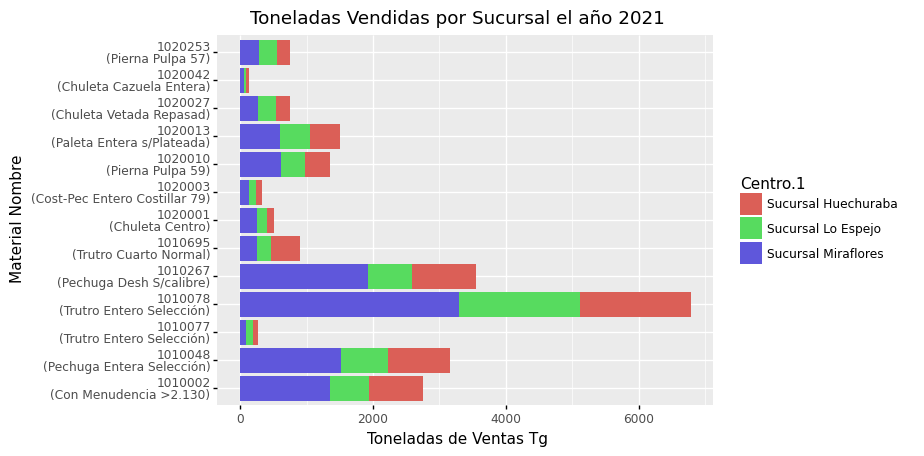

[<ggplot: (132774267817)>,
 <ggplot: (132774418195)>,
 <ggplot: (132775161676)>,
 <ggplot: (132775814909)>]

In [44]:
#         TONELADAS Material
#=================================================
# Variacion de los tonealdas por  Canal
#=================================================
Ton_list_material_2=[]
df=data_G_Sucursal_Año.copy()

(df.Año.unique()).sort()
Y_col='Toneladas de Ventas Tg'
for i in (df.Año.unique()):
    Ton_list_material_2.append(ggplot(df[df.Año==i],
                            aes(x='Material Nombre', y=Y_col, fill='Centro.1'))
     
        + geom_col(stat='identity',show_legend=True)
                   
        +ggtitle('Toneladas Vendidas por Sucursal el año ' + str(i))
             +coord_flip()
                              )
Ton_list_material_2

#### PDF 

In [47]:
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(Ton_list_Sucursal + Ton_list_material_2 
                  ,file_direct_Graphic+'/Generales/'+"Anual/Col Toneladas Anuales Material Sucursal.pdf")

save_as_pdf_pages(Ton_list_material
                  ,file_direct_Graphic+'/Generales/'+"Anual/Col Toneladas Anuales Material.pdf")
time_convert(time.time()-start_time)

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales/Anual/Col Toneladas Anuales Material Sucursal.pdf
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales/Anual/Col Toneladas Anuales Material.pdf


Time Lapsed = 0:0:2.7018191814422607 
 H:m:s


### Mensual

#### Ingresos 

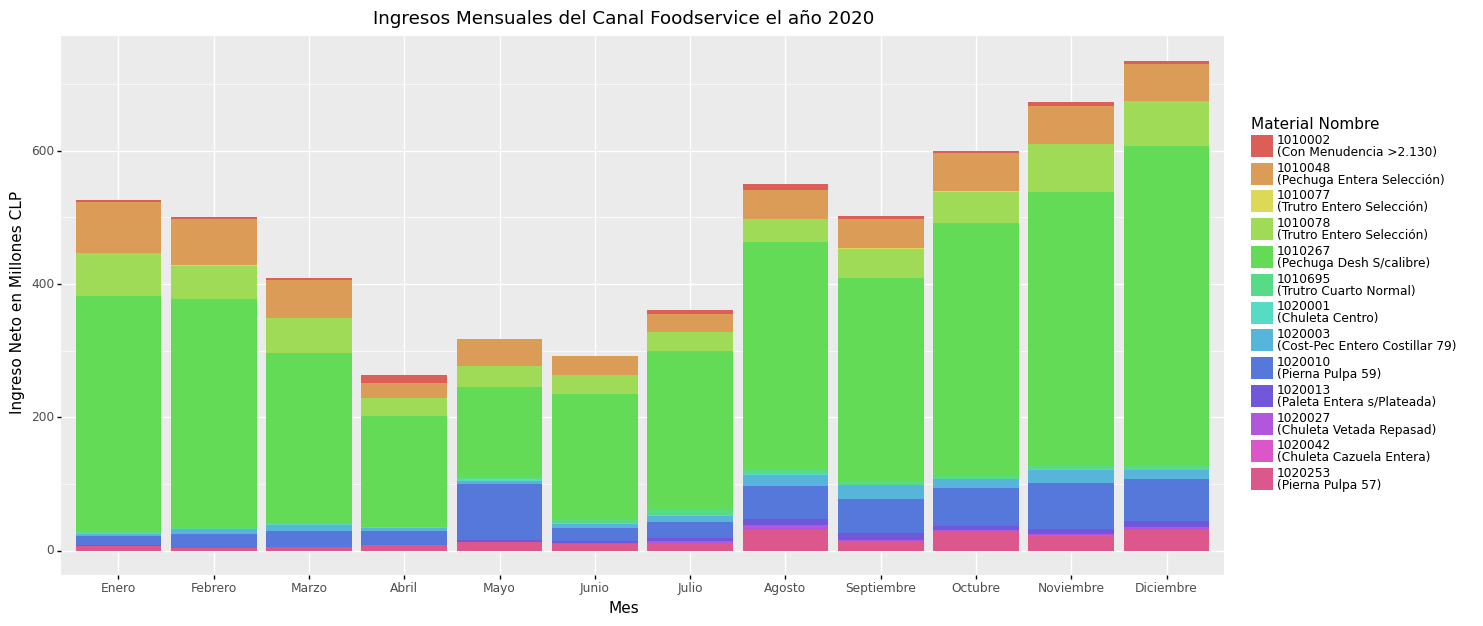

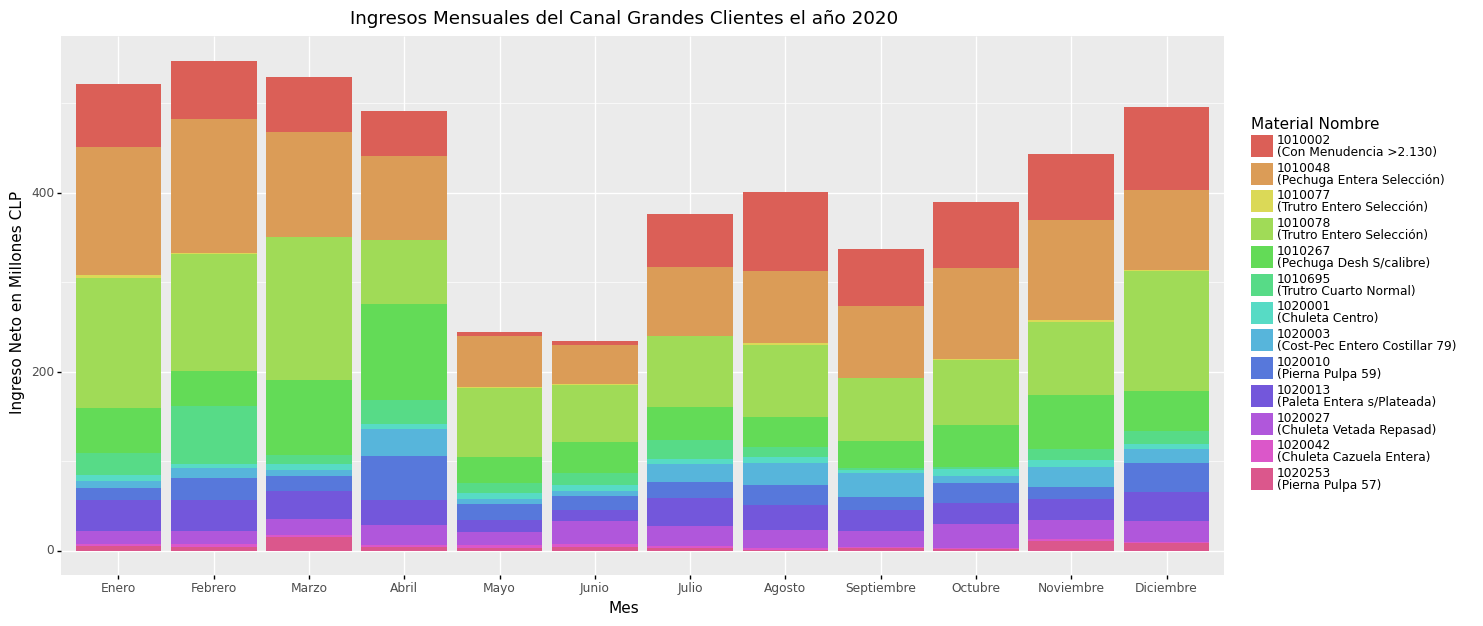

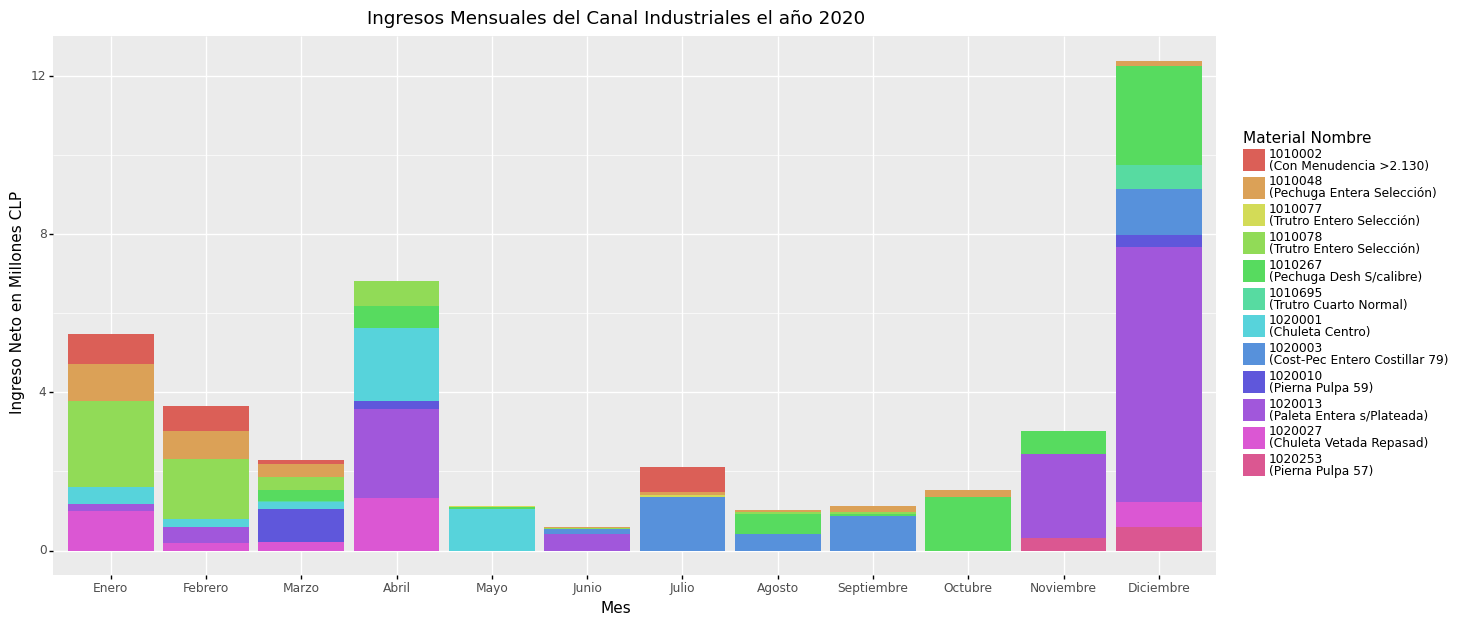

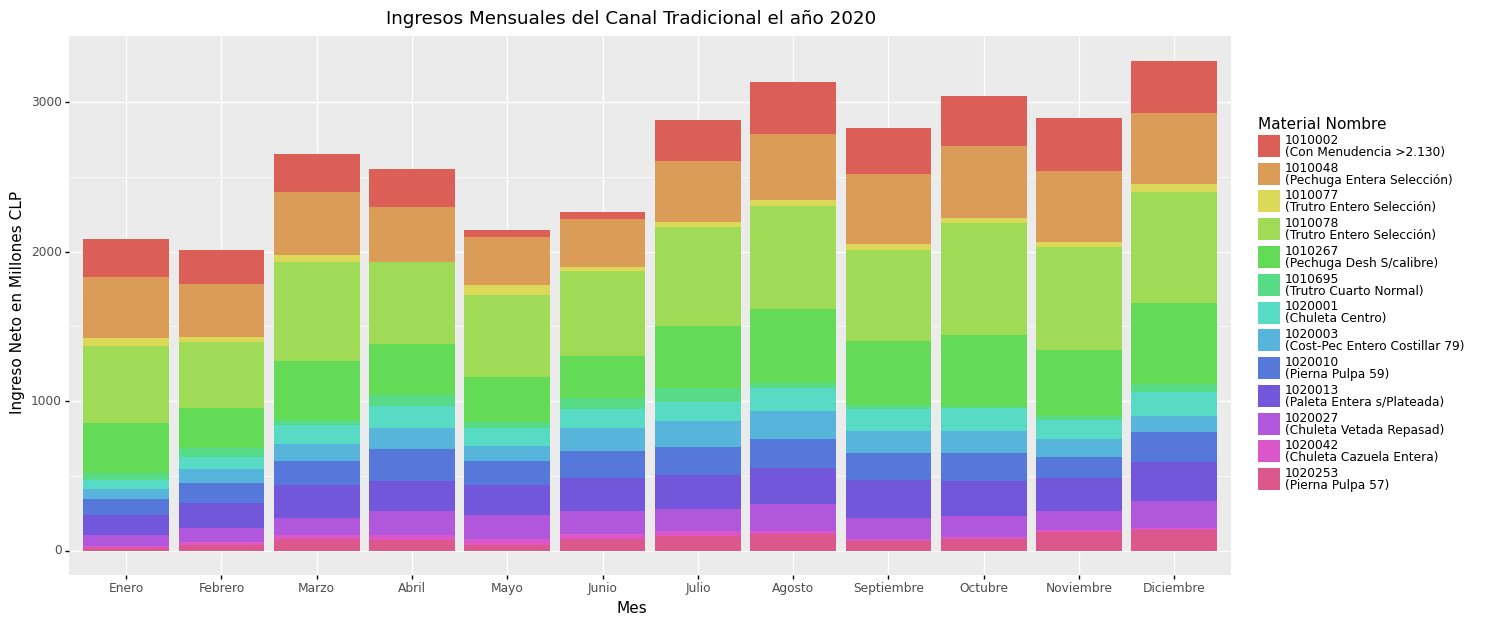

[<ggplot: (132829050962)>,
 <ggplot: (132826252165)>,
 <ggplot: (132826250213)>,
 <ggplot: (132828623014)>]

In [31]:
df=data_G_Año_Mes
df.Mes=df.Mes.apply(Mes_name)

df.columns

df['Ingreso Neto en Millones CLP']=df['Venta Neta']/10**6

# Canal
#=================================================
# Variaciond e los ingresos por material
#=================================================
Ingr_list_Canal_mes=[]
#(df.Año.unique()).sort()
Y_col='Ingreso Neto en Millones CLP'
Año_i=2020
for i in (df['Tipo de cliente'].unique()):
    Ingr_list_Canal_mes.append(ggplot(
        df[(df['Tipo de cliente']==i) & (df.Año==Año_i)],
                            aes(x='Mes', y=Y_col, fill='Material Nombre'))
     
        + geom_col(stat='identity',show_legend=True)
                   
        +ggtitle('Ingresos Mensuales del Canal ' + str(i)+ ' el año '+ str(Año_i) )
           +theme(axis_text_x = element_text(),figure_size=(15,7) )#angle=90, hjust=1))
                          )
Ingr_list_Canal_mes

Foodservice
Grandes Clientes
Industriales
Tradicional


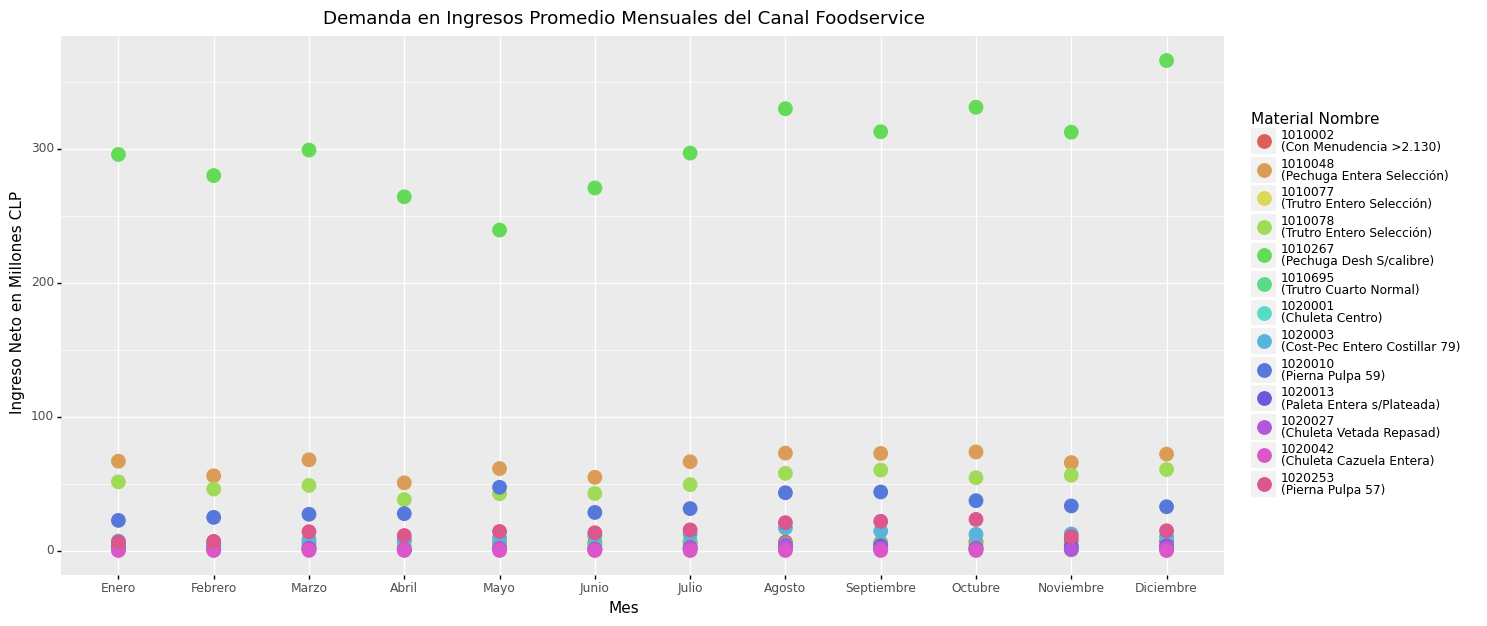

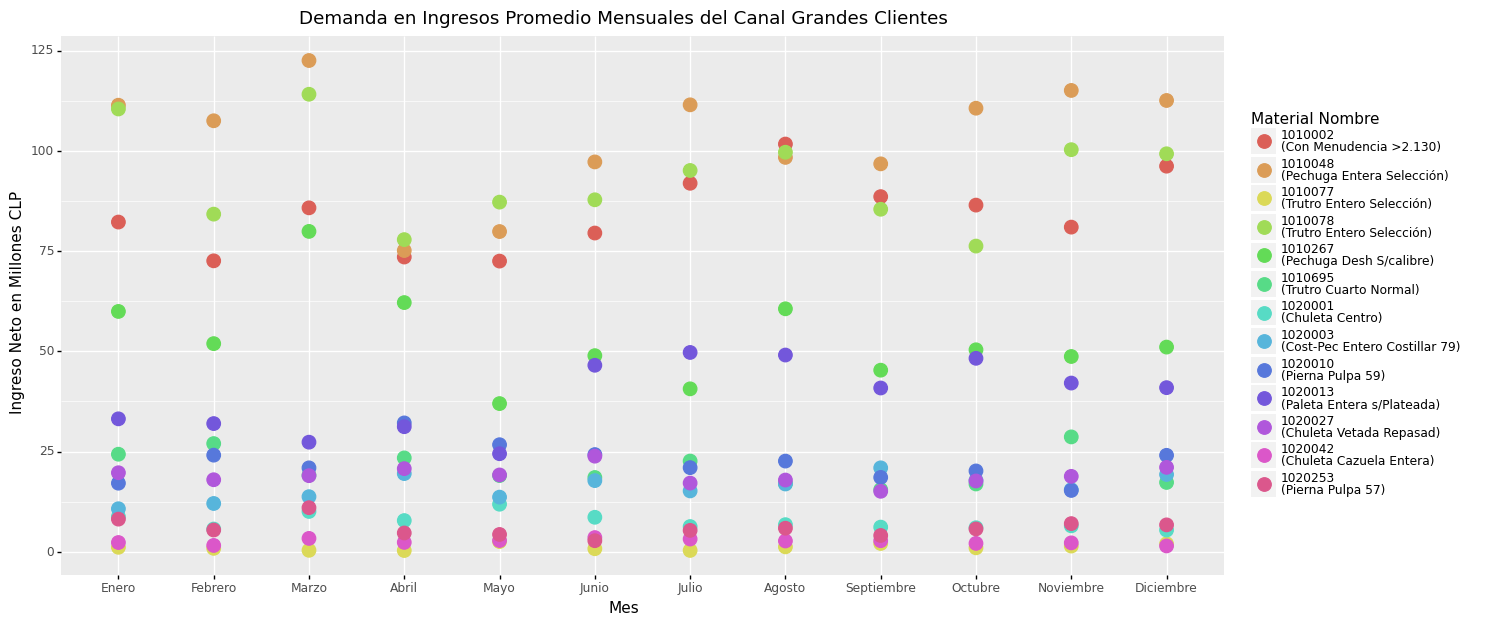

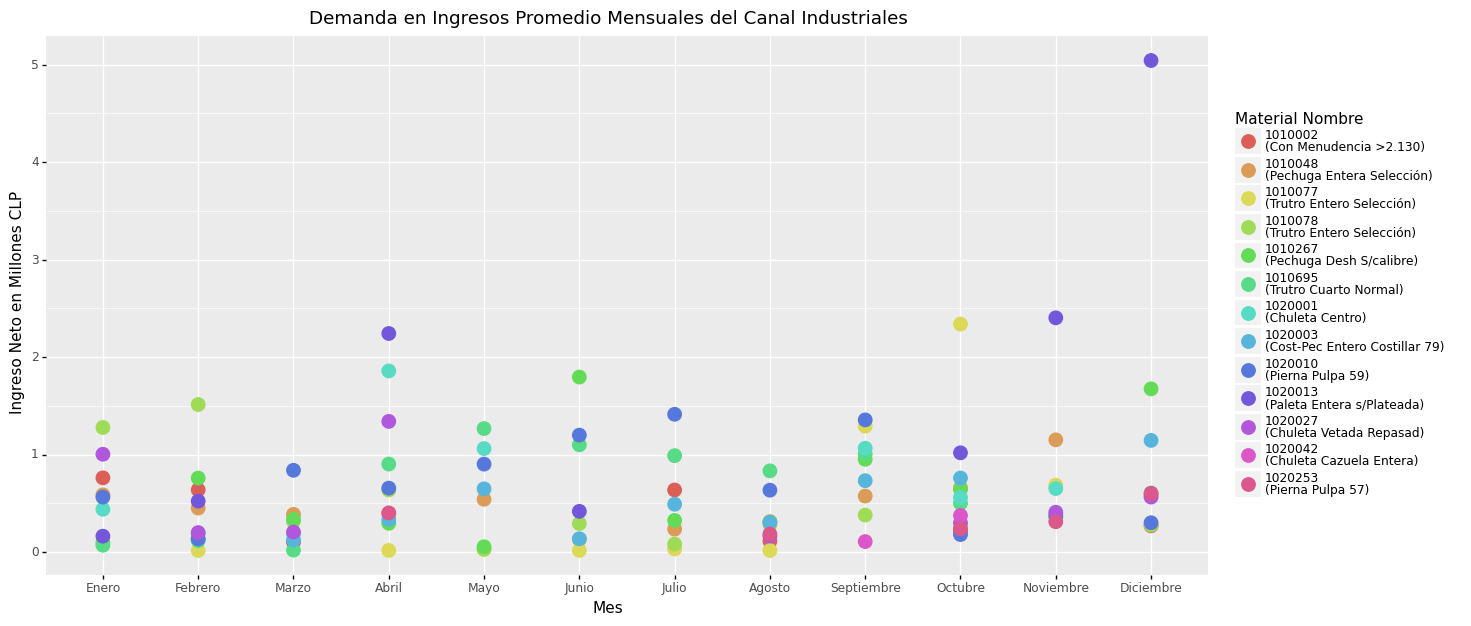

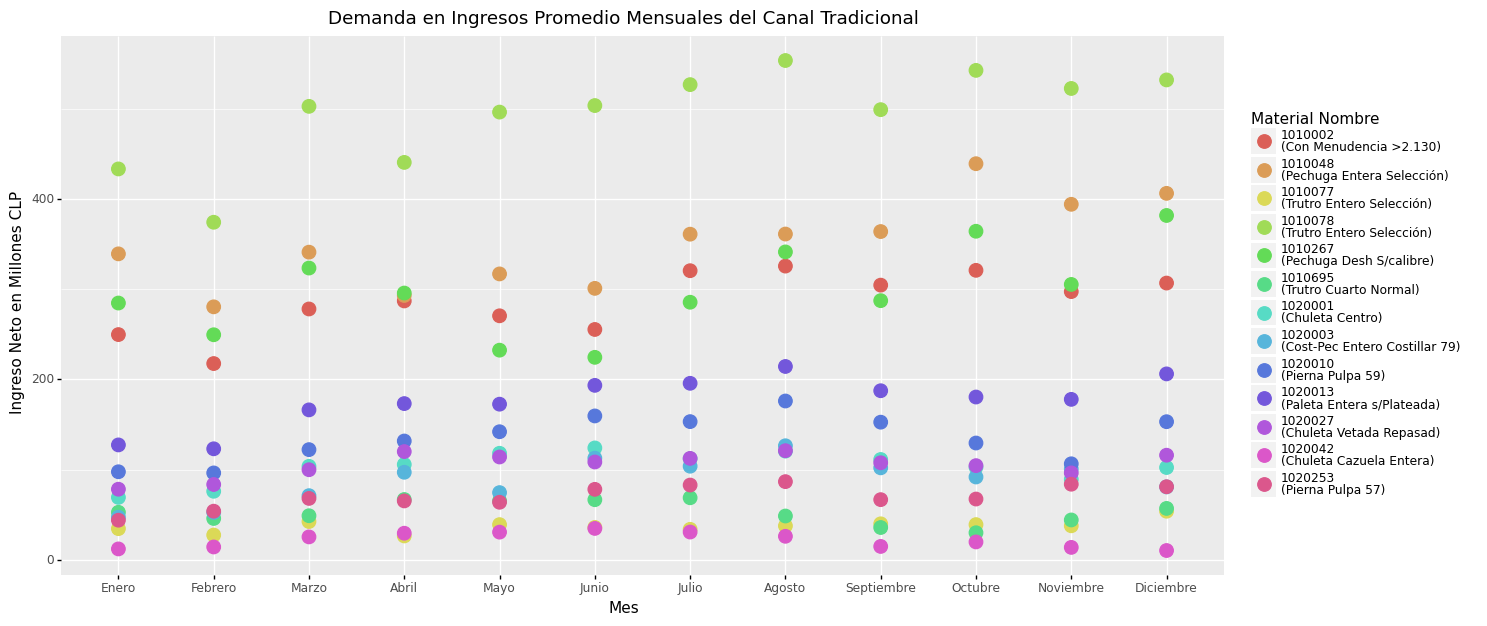

[<ggplot: (132828983540)>,
 <ggplot: (132775070443)>,
 <ggplot: (132825994228)>,
 <ggplot: (132825999213)>]

In [32]:
# INGRESOS Canal Puntos
#=================================================
# Variaciond e los Toneladas por material
#=================================================
Ingr_list_Canal_mes_promedio=[]
#(df.Año.unique()).sort()
Y_col='Ingreso Neto en Millones CLP'
#Año_i=2020

#==================================
# DATA PROMEDIO MENSUAL
df_i=df.groupby(['Tipo de cliente', 'Material Nombre','Mes']).mean().reset_index()
df_i=df_i[df_i[Y_col].notnull()==True]

for i in (df['Tipo de cliente'].unique()):
    print(i)
    Ingr_list_Canal_mes_promedio.append(ggplot(
        df_i.loc[(df_i['Tipo de cliente']==i)]
        ,
                            aes(x='Mes', y=Y_col, color='Material Nombre'))
     
        + geom_point(size=5)
                   
        +ggtitle('Demanda en Ingresos Promedio Mensuales del Canal ' + str(i) )
           +theme(axis_text_x = element_text(),figure_size=(15,7) )#angle=90, hjust=1))
                          )
Ingr_list_Canal_mes_promedio

#### PDF 

In [33]:
#============================
# Ingreso Mensual
#============================
start_time = time.time()
save_as_pdf_pages(Ingr_list_Canal_mes +Ingr_list_Canal_mes_promedio
                  ,file_direct_Graphic+'/Generales/Mensual'+"/Ingresos Mensual Canal.pdf")

time_convert(time.time()-start_time)

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales/Mensual/Ingresos Mensual Canal.pdf


Time Lapsed = 0:0:2.413572072982788 
 H:m:s


#### Toneladas 

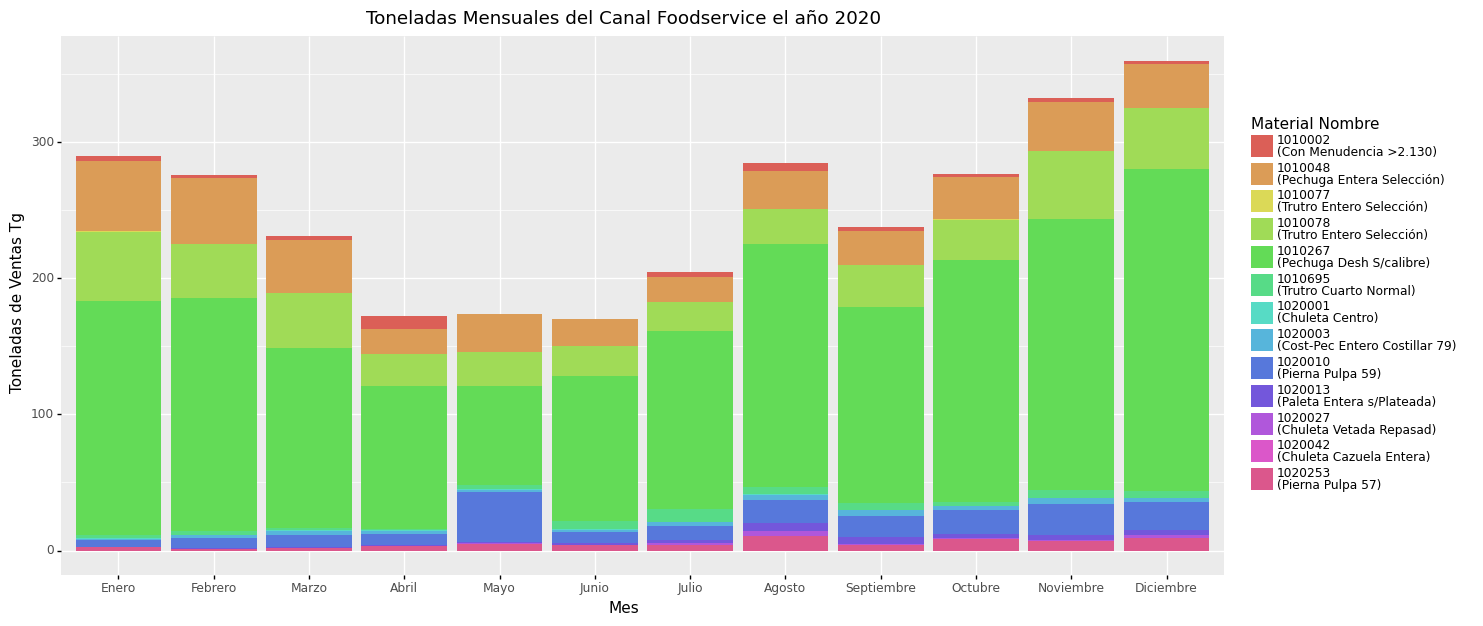

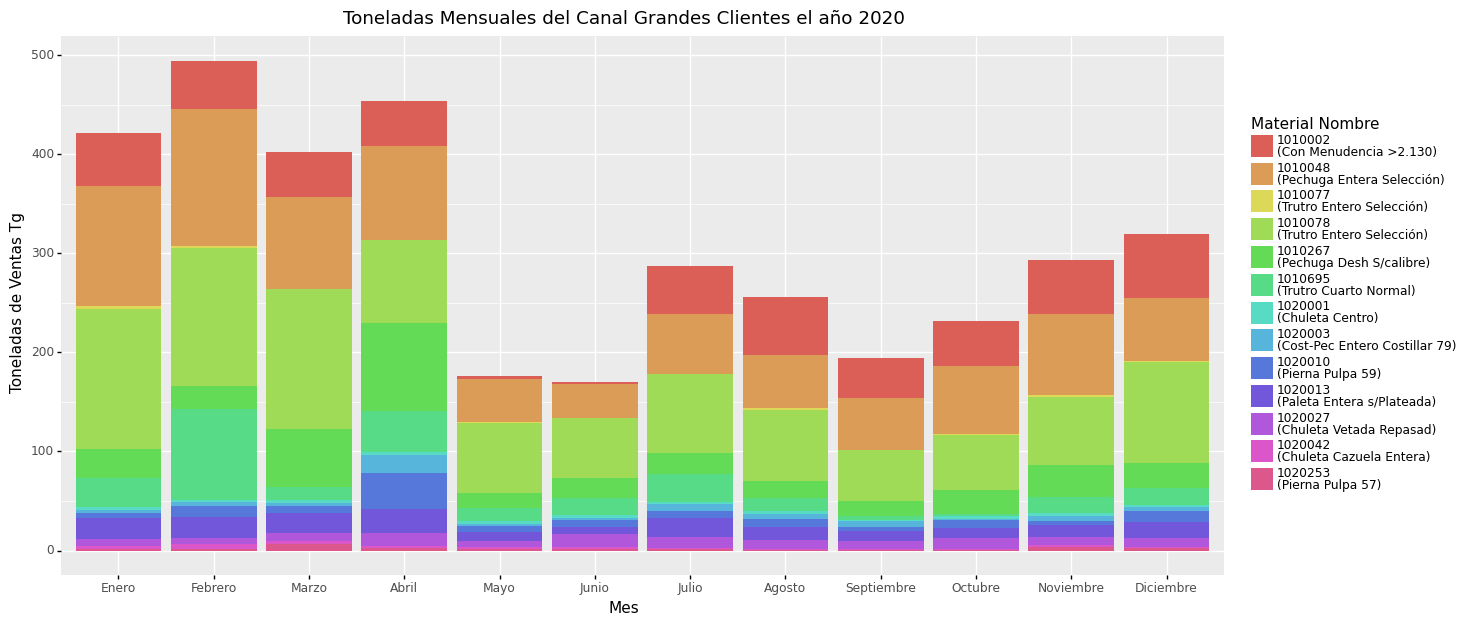

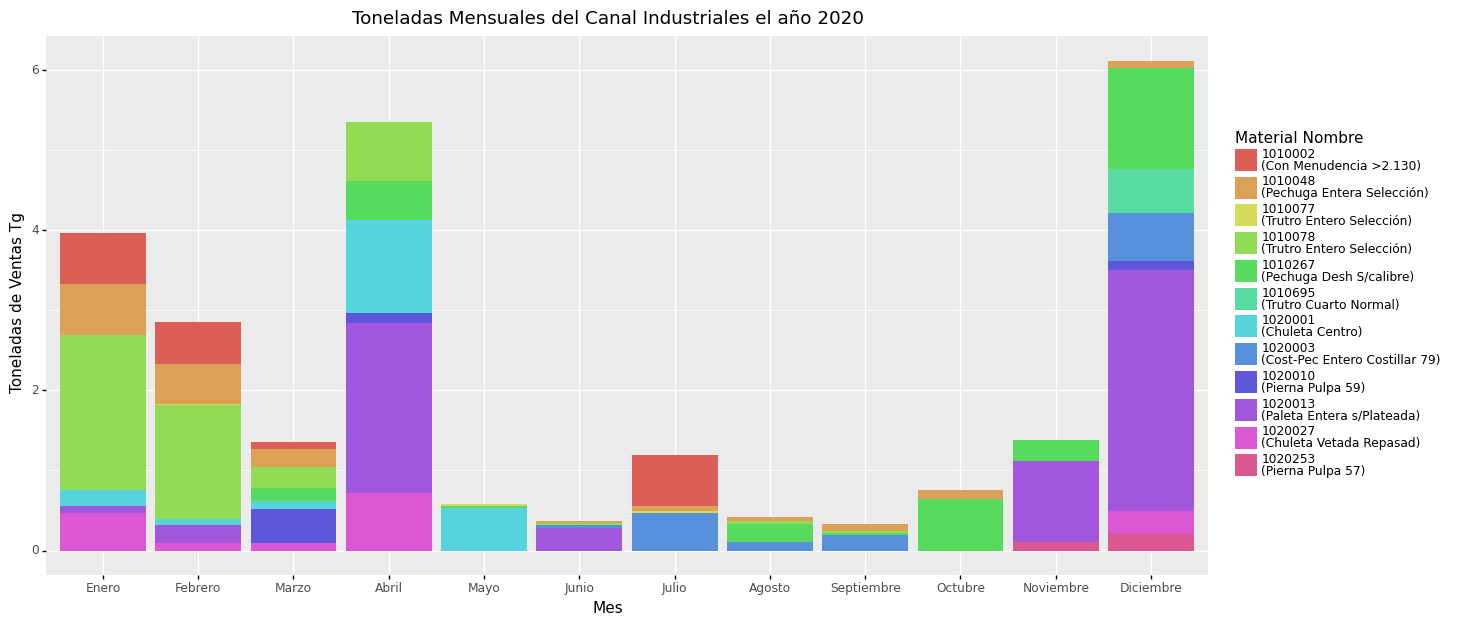

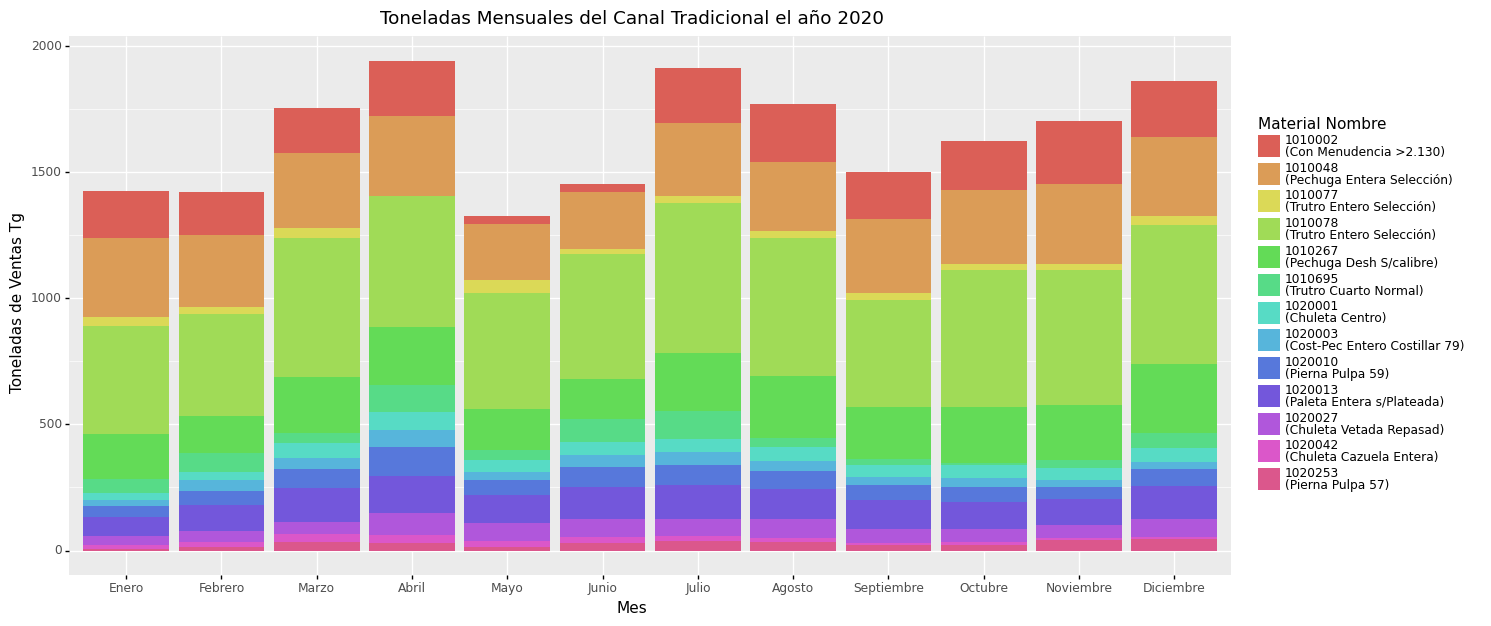

[<ggplot: (132775043500)>,
 <ggplot: (132774331052)>,
 <ggplot: (132828043767)>,
 <ggplot: (132825668157)>]

In [34]:
# TONELADAS Canal
#=================================================
# Variaciond e los Toneladas por material
#=================================================
df=data_G_Año_Mes.copy()
Ton_list_Canal_mes=[]
#(df.Año.unique()).sort()
Y_col='Toneladas de Ventas Tg'
Año_i=2020
for i in (df['Tipo de cliente'].unique()):
    Ton_list_Canal_mes.append(ggplot(
        df[(df['Tipo de cliente']==i) & (df.Año==Año_i)],
                            aes(x='Mes', y=Y_col, fill='Material Nombre'))
     
        + geom_col(stat='identity',show_legend=True)
                   
        +ggtitle('Toneladas Mensuales del Canal ' + str(i)+ ' el año '+ str(Año_i) )
           +theme(axis_text_x = element_text(),figure_size=(15,7) )#angle=90, hjust=1))
                          )
Ton_list_Canal_mes

Foodservice
Grandes Clientes
Industriales
Tradicional


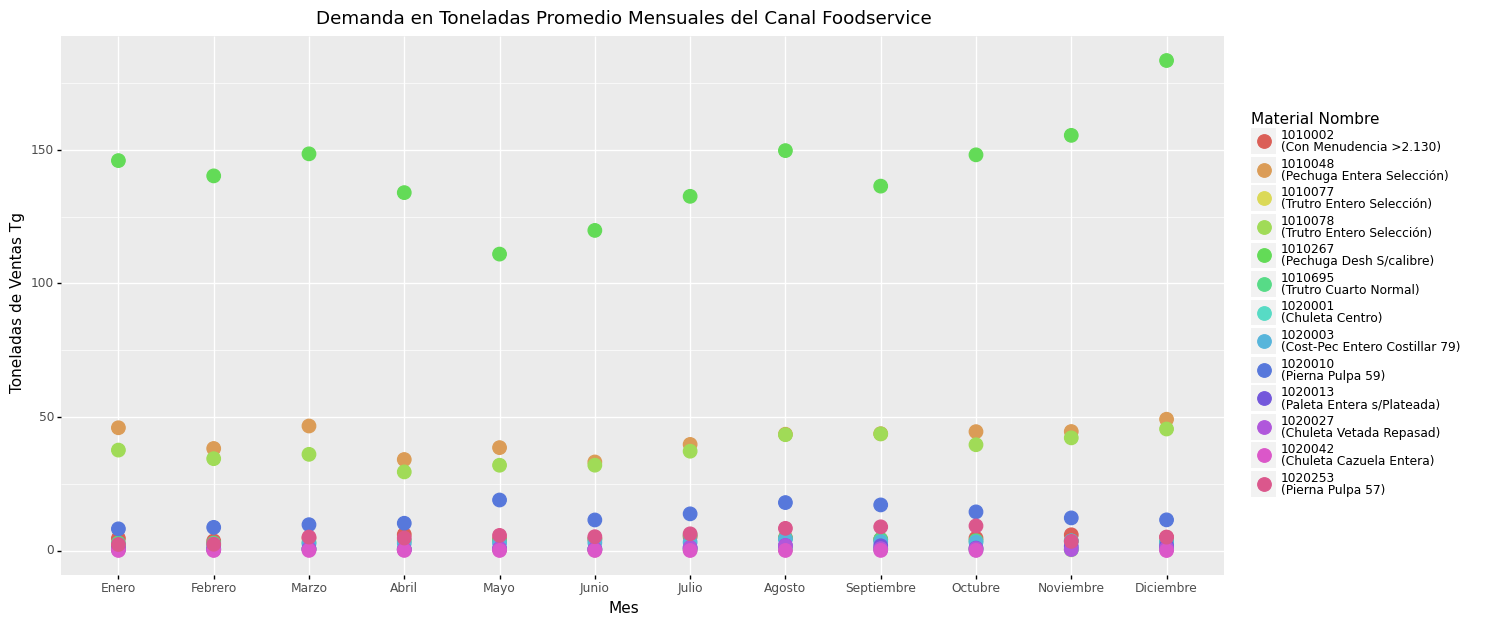

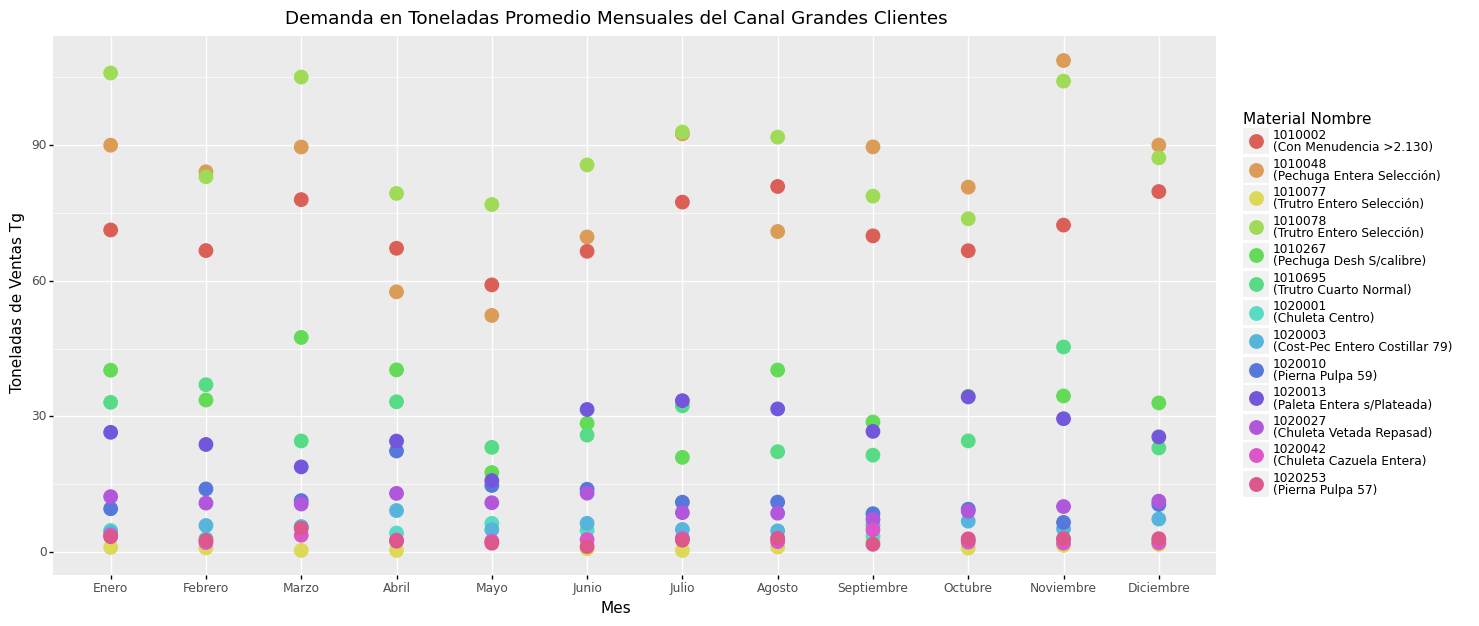

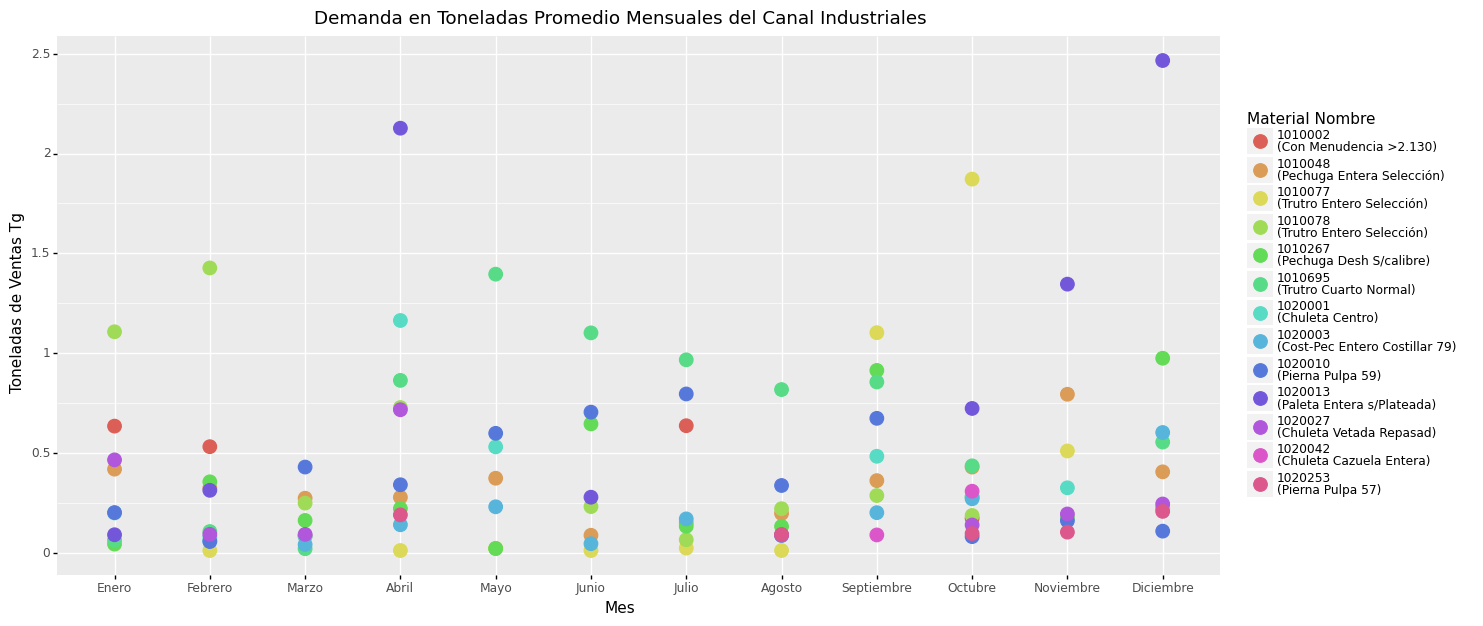

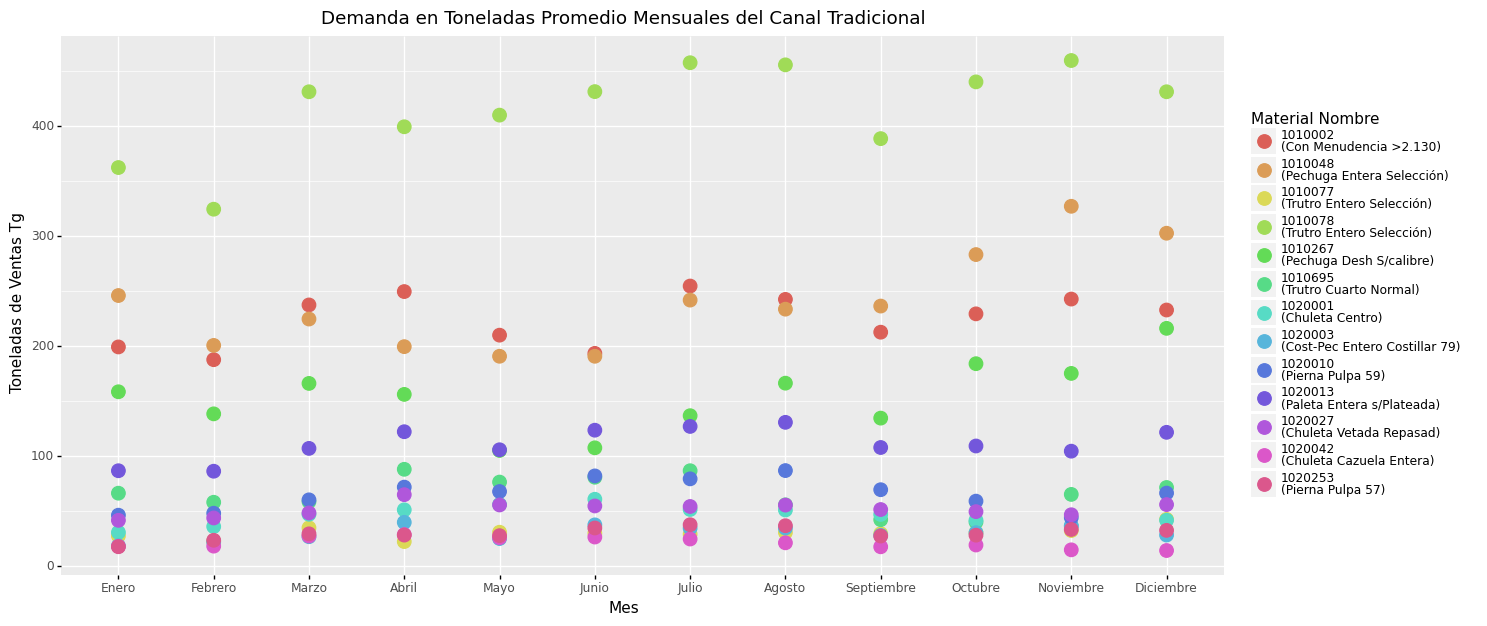

[<ggplot: (132775118547)>,
 <ggplot: (132774404377)>,
 <ggplot: (132774393697)>,
 <ggplot: (132828333556)>]

In [35]:
# TONELADAS Canal Puntos
#=================================================
# Variaciond e los Toneladas por material
#=================================================
Ton_list_Canal_mes_promedio=[]
#(df.Año.unique()).sort()
Y_col='Toneladas de Ventas Tg'
#Año_i=2020

#==================================
# DATA PROMEDIO MENSUAL
df_i=df.groupby(['Tipo de cliente', 'Material Nombre','Mes']).mean().reset_index()
df_i=df_i[df_i['Toneladas de Ventas Tg'].notnull()==True]

for i in (df['Tipo de cliente'].unique()):
    print(i)
    Ton_list_Canal_mes_promedio.append(ggplot(
        df_i.loc[(df_i['Tipo de cliente']==i)]
        ,
                            aes(x='Mes', y=Y_col, color='Material Nombre'))
     
        + geom_point(size=5)
                   
        +ggtitle('Demanda en Toneladas Promedio Mensuales del Canal ' + str(i) )
           +theme(axis_text_x = element_text(),figure_size=(15,7) )#angle=90, hjust=1))
                          )
Ton_list_Canal_mes_promedio

#### PDF 

In [36]:
#============================
# Ingreso Mensual
#============================
start_time = time.time()
save_as_pdf_pages(Ton_list_Canal_mes +Ton_list_Canal_mes_promedio
                  ,file_direct_Graphic+'/Generales/Mensual'+"/Demanda Mensual Canal.pdf")

time_convert(time.time()-start_time)

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/user/Documents/Graficos/Generales/Mensual/Demanda Mensual Canal.pdf


Time Lapsed = 0:0:2.3915531635284424 
 H:m:s


In [37]:
x=start_time_0 - time.time()

In [39]:
time_convert(-x)

Time Lapsed = 0:1:4.778335094451904 
 H:m:s


# Precio volumen 

Como son graficos de dispersion, puede que no sea conveniente evualuar a cada uno de los canales, por lo cual se procede a atacar al canal tradicional.